In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [14]:
df=pd.read_csv('Carss.csv')

In [15]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [16]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [17]:
df.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [18]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300

In [ ]:
#scatter matrix
#pairplot

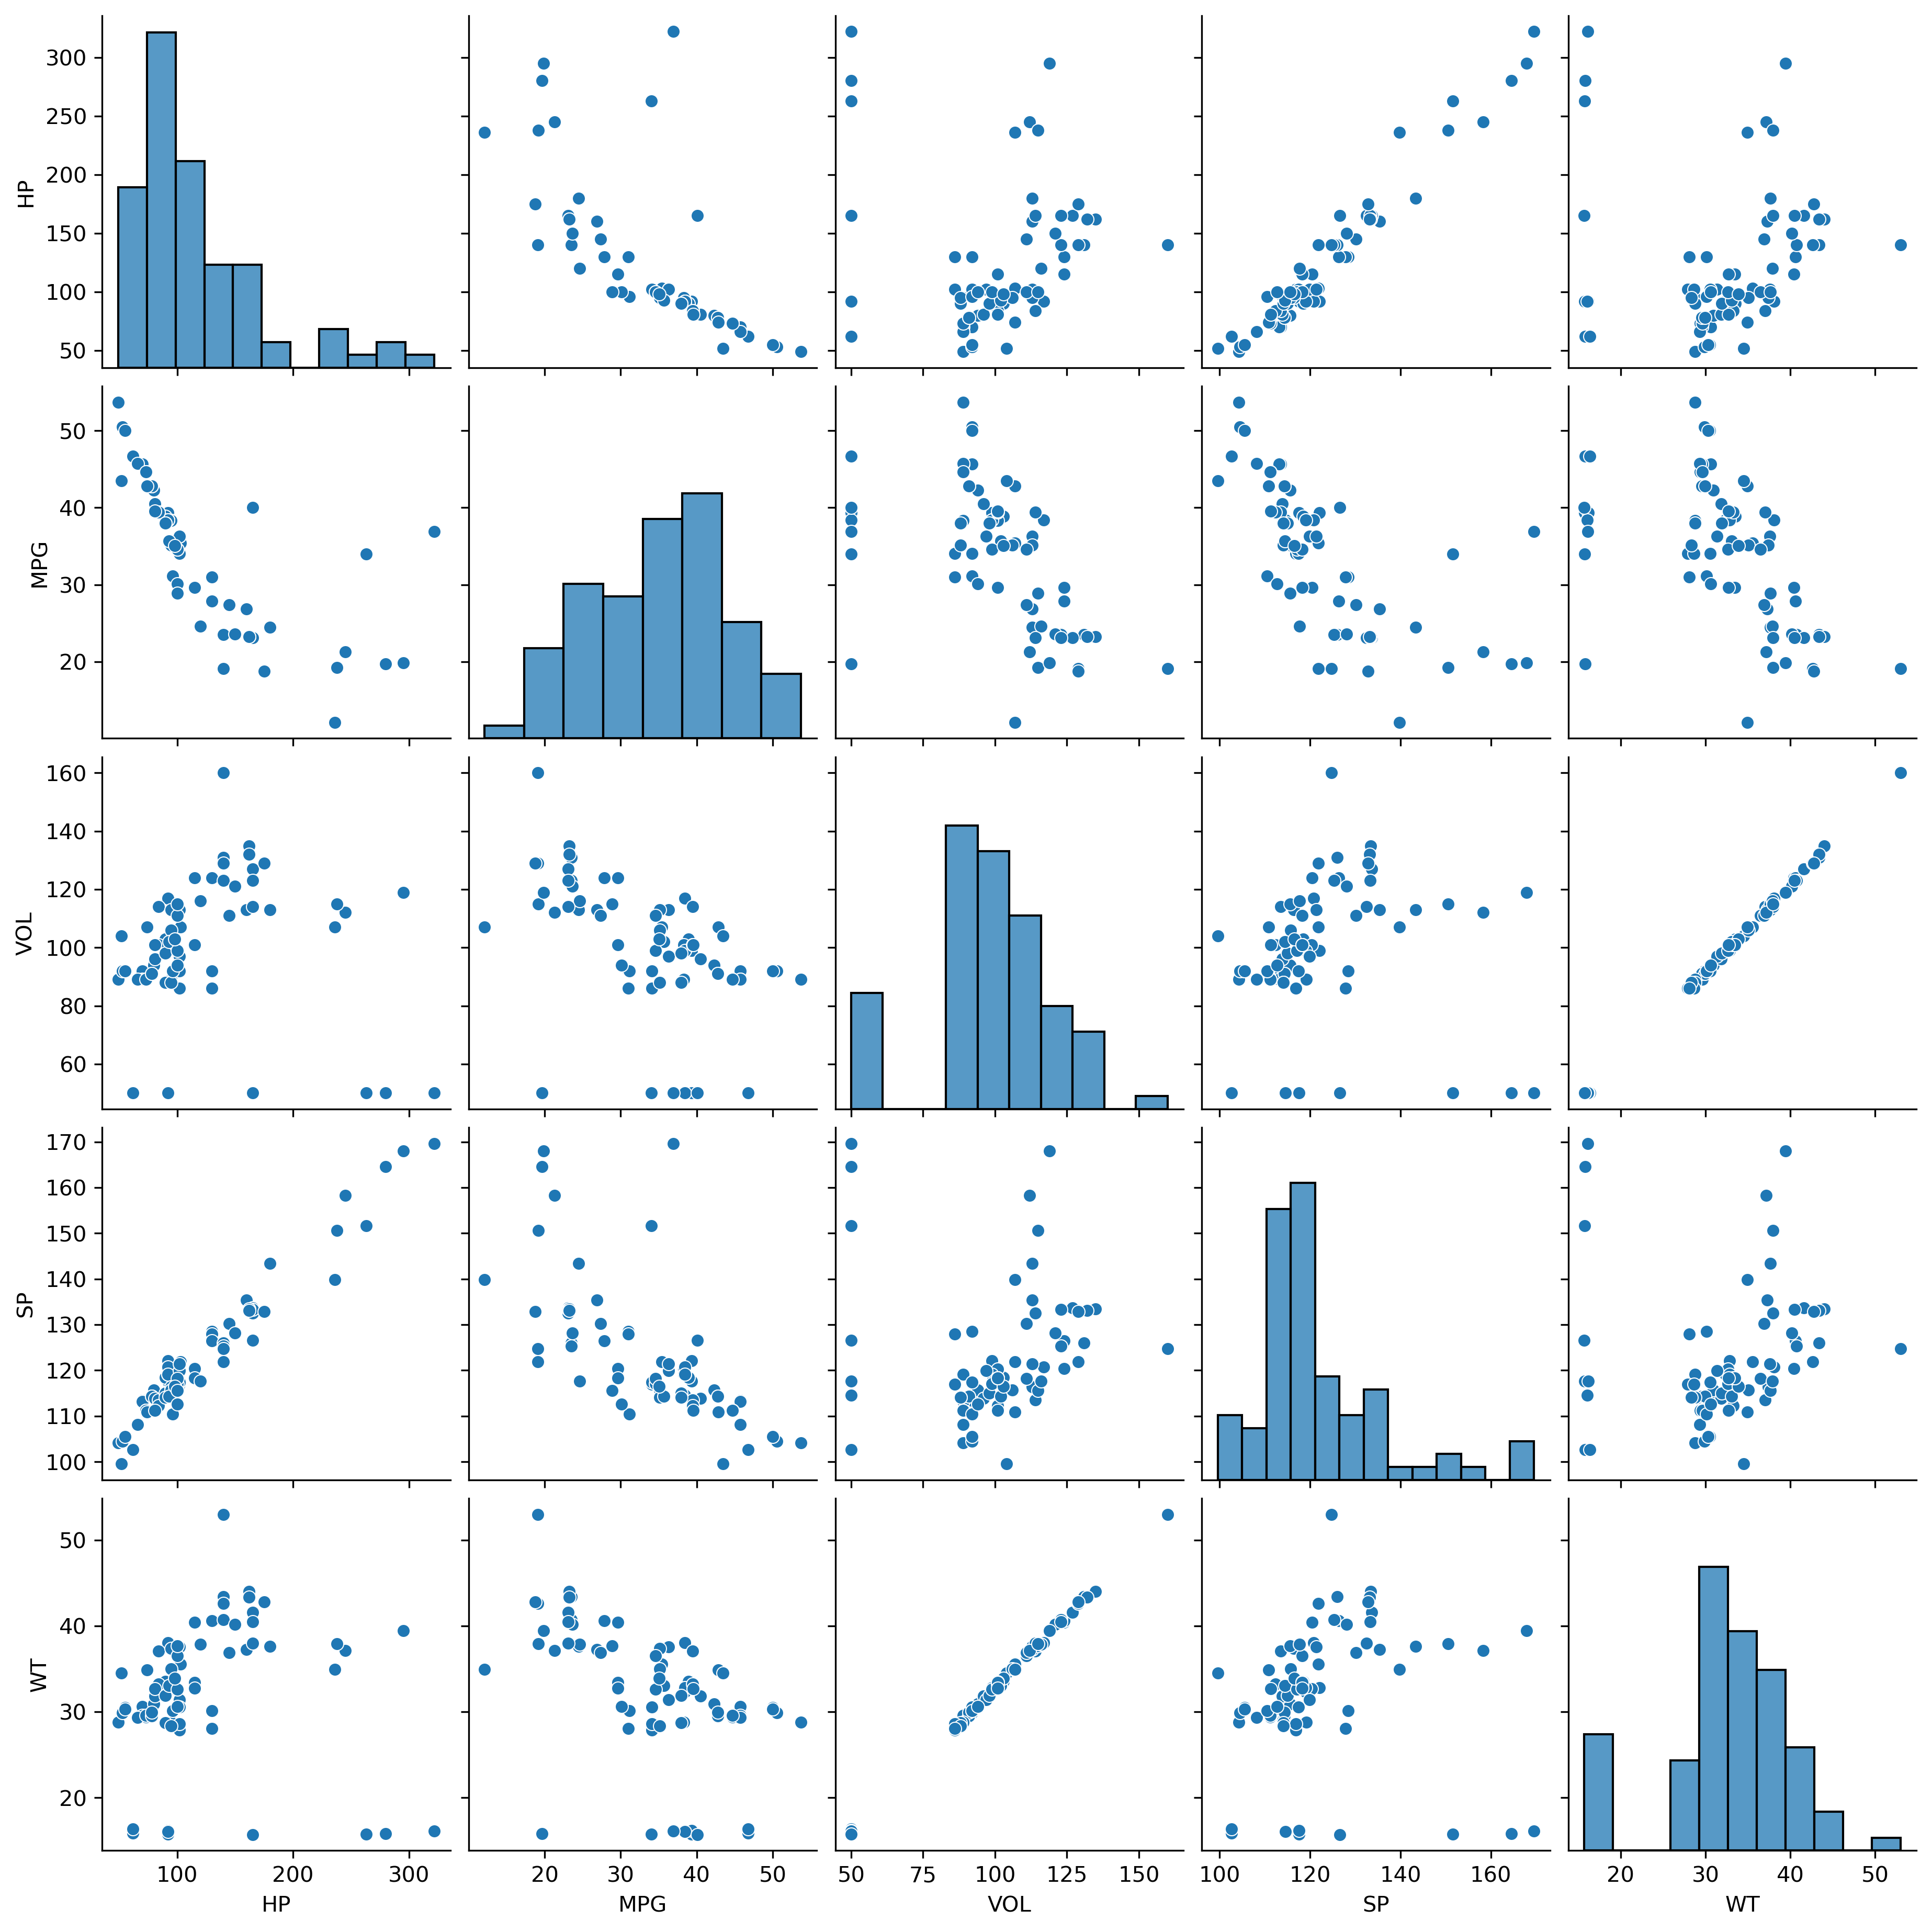

In [19]:
sns.pairplot(df)

In [20]:
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


<AxesSubplot:>

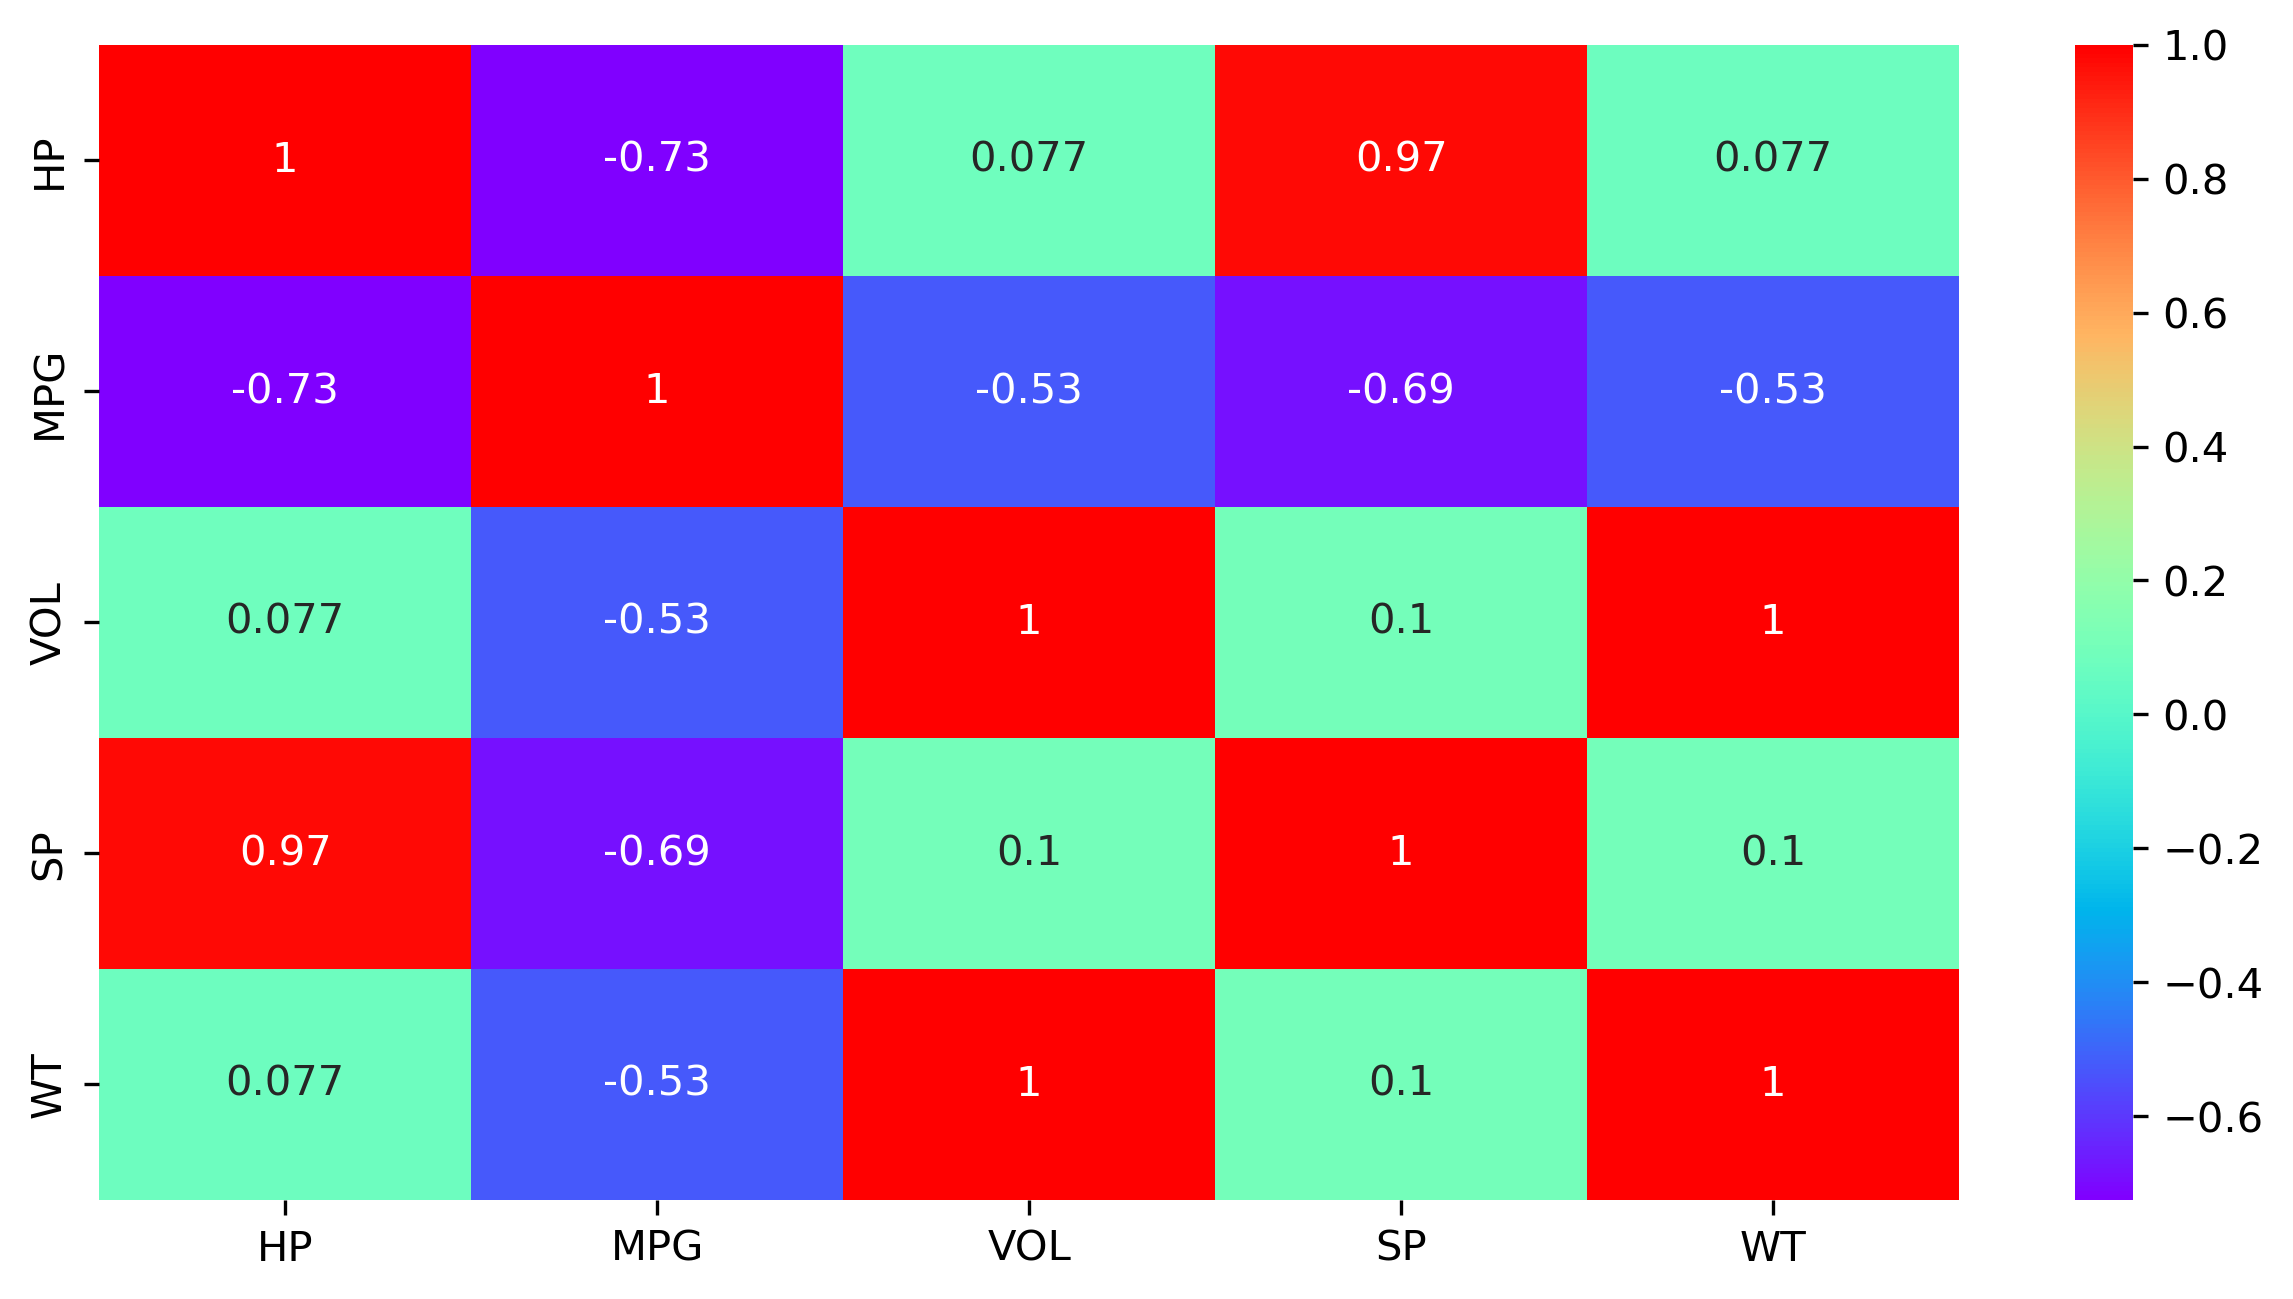

In [9]:
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

In [21]:
import statsmodels.formula .api as smf

In [22]:
model=smf.ols('MPG~HP+VOL+SP+WT',data=df).fit()

In [23]:
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.54e-23
Time:                        22:36:56   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
vol_model1=smf.ols('MPG~VOL',data=df).fit()

In [15]:
vol_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           3.82e-07
Time:                        22:37:21   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
WT_model1=smf.ols('MPG~WT',data=df).fit()

In [17]:
WT_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           4.38e-07
Time:                        22:37:30   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model2=smf.ols('MPG~WT+VOL',data=df).fit()

In [19]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           2.43e-06
Time:                        22:37:39   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Calculating VIF

In [20]:
df.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [21]:
r_hp=smf.ols('HP~VOL+SP+WT',data=df).fit().rsquared
v_hp=1/(1-r_hp)

r_vol=smf.ols('VOL~HP+SP+WT',data=df).fit().rsquared
v_vol=1/(1-r_vol)

r_sp=smf.ols('SP~HP+VOL+WT',data=df).fit().rsquared
v_sp=1/(1-r_sp)

r_wt=smf.ols('WT~HP+VOL+SP',data=df).fit().rsquared
v_wt=1/(1-r_wt)


In [23]:
vif=pd.DataFrame({
    'Features':['HP','VOL','SP','WT'],
    'VIF':[v_hp,v_vol,v_sp,v_wt]
})
vif

,Features,VIF
0,HP,19.926589
1,VOL,638.806084
2,SP,20.007639
3,WT,639.533818


In [33]:
df.drop(columns='WT',inplace=True)

In [34]:
df

,HP,MPG,VOL,SP
0,49,53.700681,89,104.185353
1,55,50.013401,92,105.461264
2,55,50.013401,92,105.461264
3,70,45.696322,92,113.461264
4,53,50.504232,92,104.461264
...,...,...,...,...
76,322,36.900000,50,169.598513
77,238,19.197888,115,150.576579
78,263,34.000000,50,151.598513
79,295,19.833733,119,167.944460


In [36]:
final_model=smf.ols('MPG~VOL+SP',data=df).fit()

In [37]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     84.77
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           2.75e-20
Time:                        22:49:04   Log-Likelihood:                -246.81
No. Observations:                  81   AIC:                             499.6
Df Residuals:                      78   BIC:                             506.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.2405      5.420     19.050      0.000      92.451     114.030
VOL           -0.1899      0.026     -7.257      0.000      -0.242      -0.138
SP            -0.4119      0.041    -10.013      0.000      -0.494      -0.330
==============================================================================
Omnibus:                        0.252   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.438
Skew:                          -0.032   Prob(JB):                        0.803
Kurtosis:                       2.646   Cond. No.                     1.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Subset Selection
AIC

In [24]:
wt = smf.ols('MPG~WT+HP+SP',data=df).fit()

print(wt.rsquared, wt.aic)

0.769482813998346 476.29927501529767


In [25]:
vol = smf.ols('MPG~VOL+HP+SP', data=df).fit()

print(vol.rsquared, vol.aic)

0.7703683413213022 475.9875158854609


In [26]:
vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           1.56e-24
Time:                        10:39:09   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MODEL VALIDATION TECHNIQUES

# 1.Residual Analysis
As per the subset selection, it is clear that VOL column is more important than WT column as it's R2 value is more and AIC value is less,So we will select VOL columns and will drop WT column.

NORMALITY TEST

In [27]:
import statsmodels.api as sm

In [28]:
vol.resid

0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

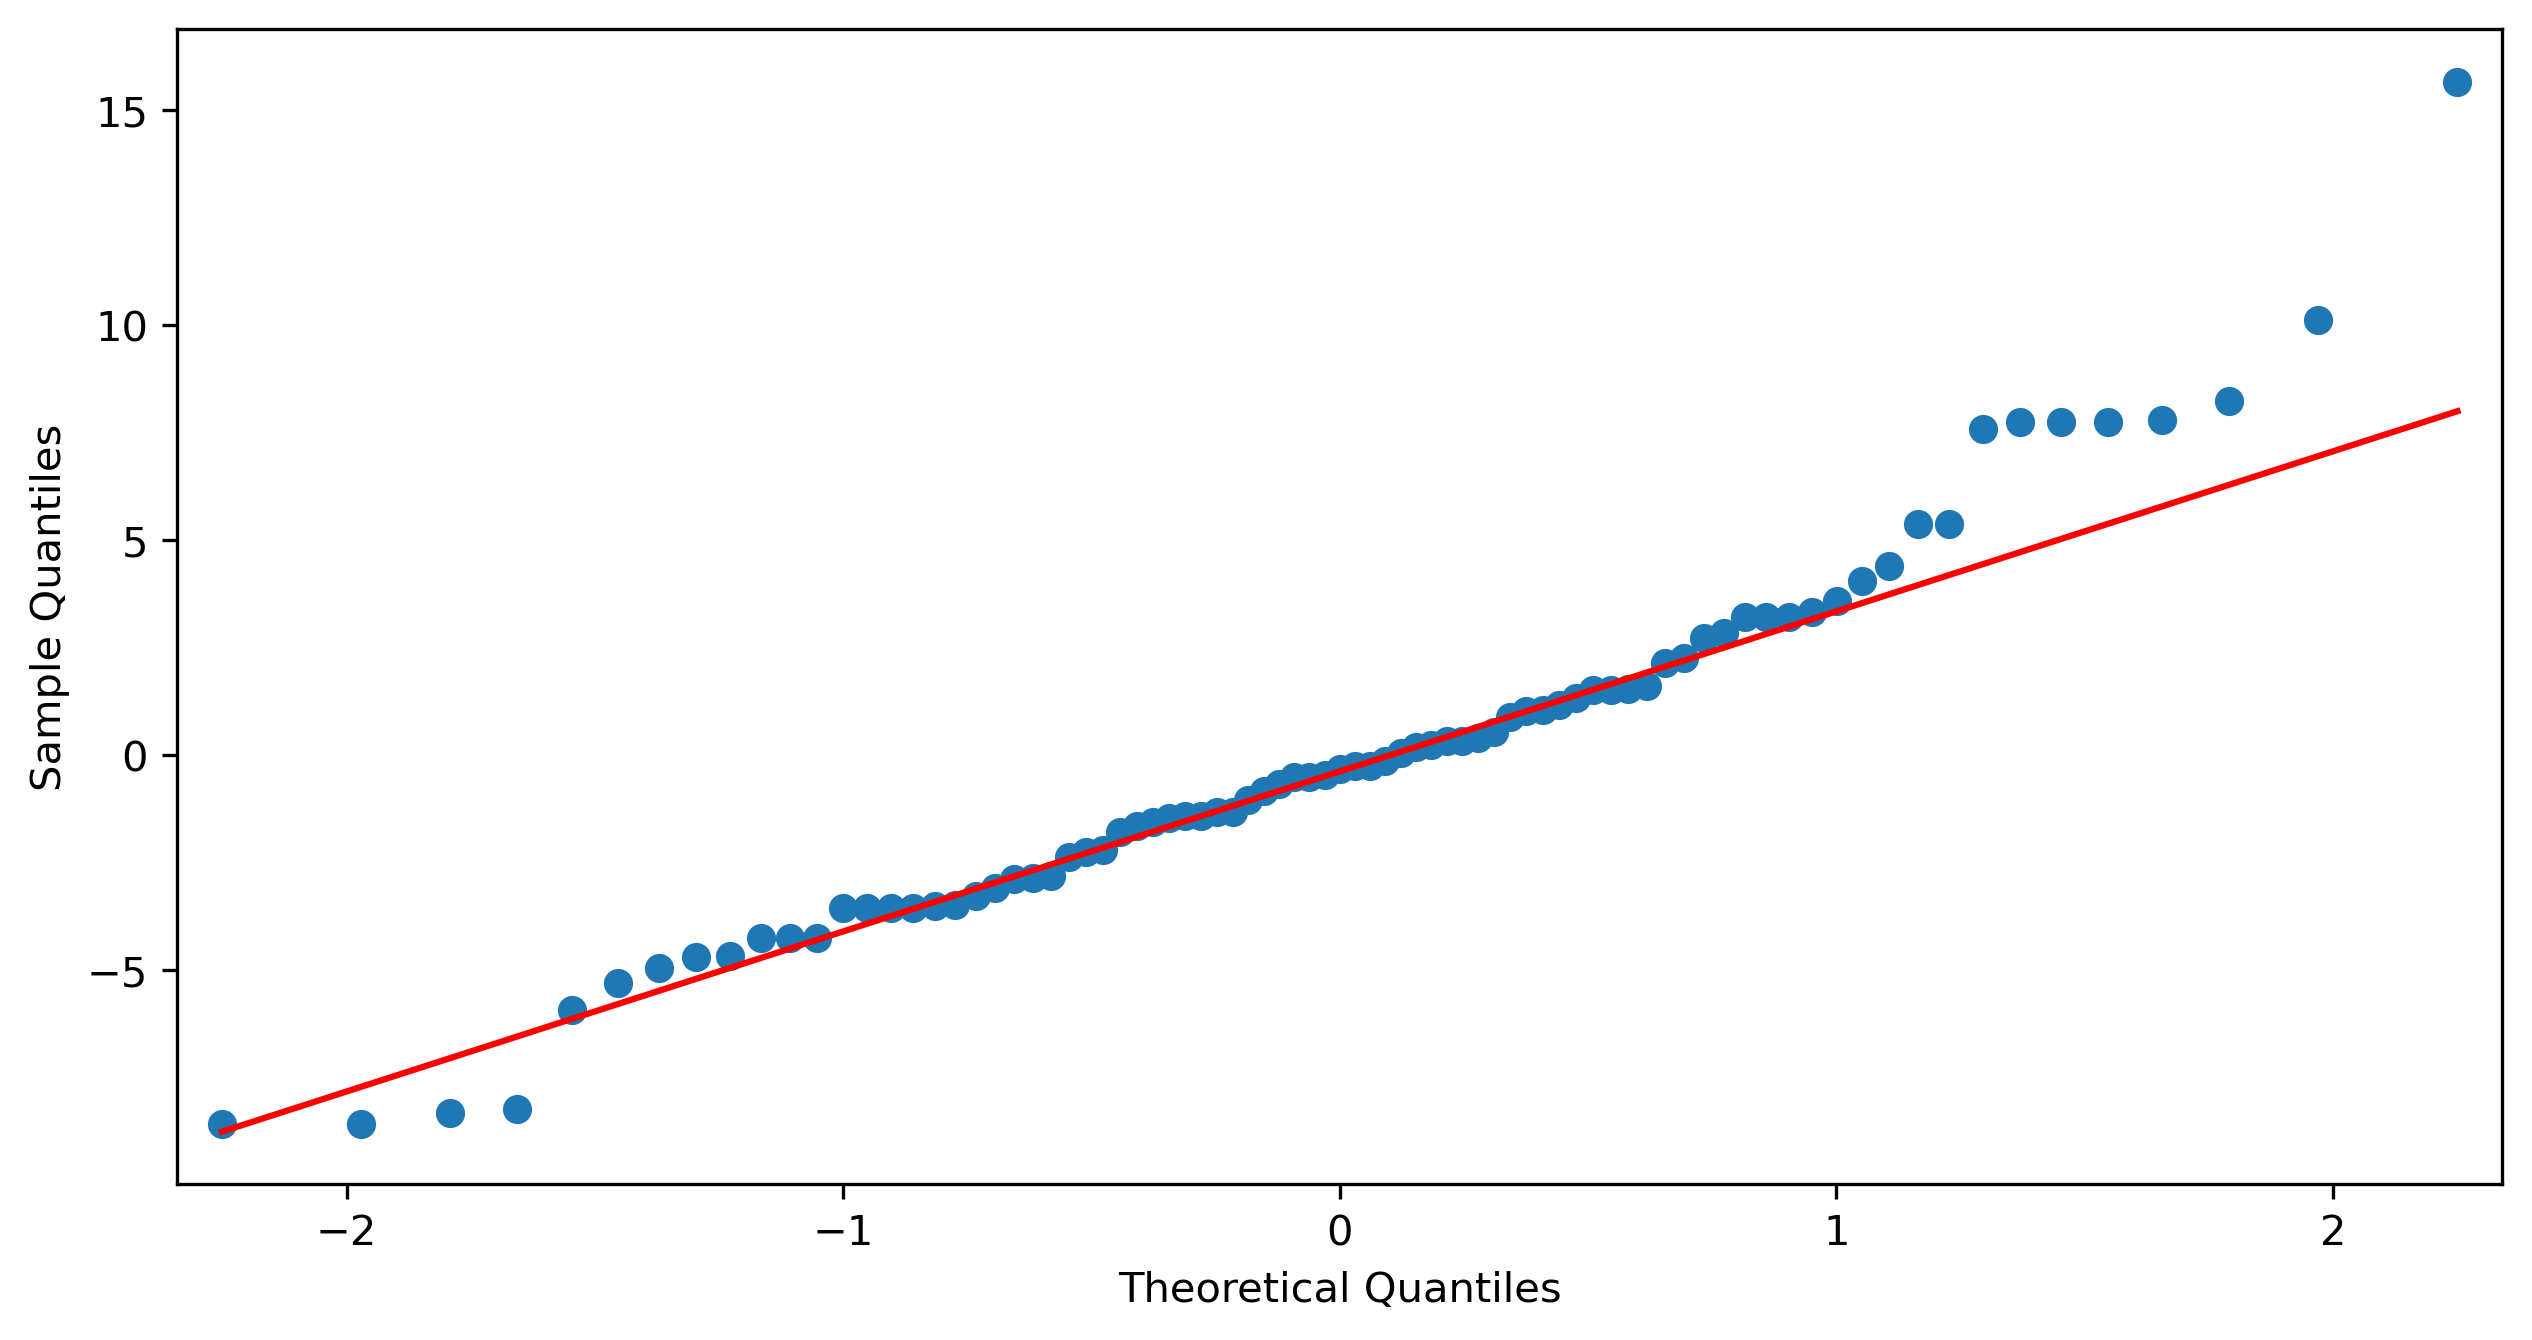

In [29]:
#Q-Q plot
sm.qqplot(vol.resid, line = 'q');

In [30]:
np.where(vol.resid>10)

(array([ 0, 76], dtype=int64),)

In [31]:
#get index for higher residuals

# 2. Residual plot of Homoscedasticity
- Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

Text(0, 0.5, 'Residuals')

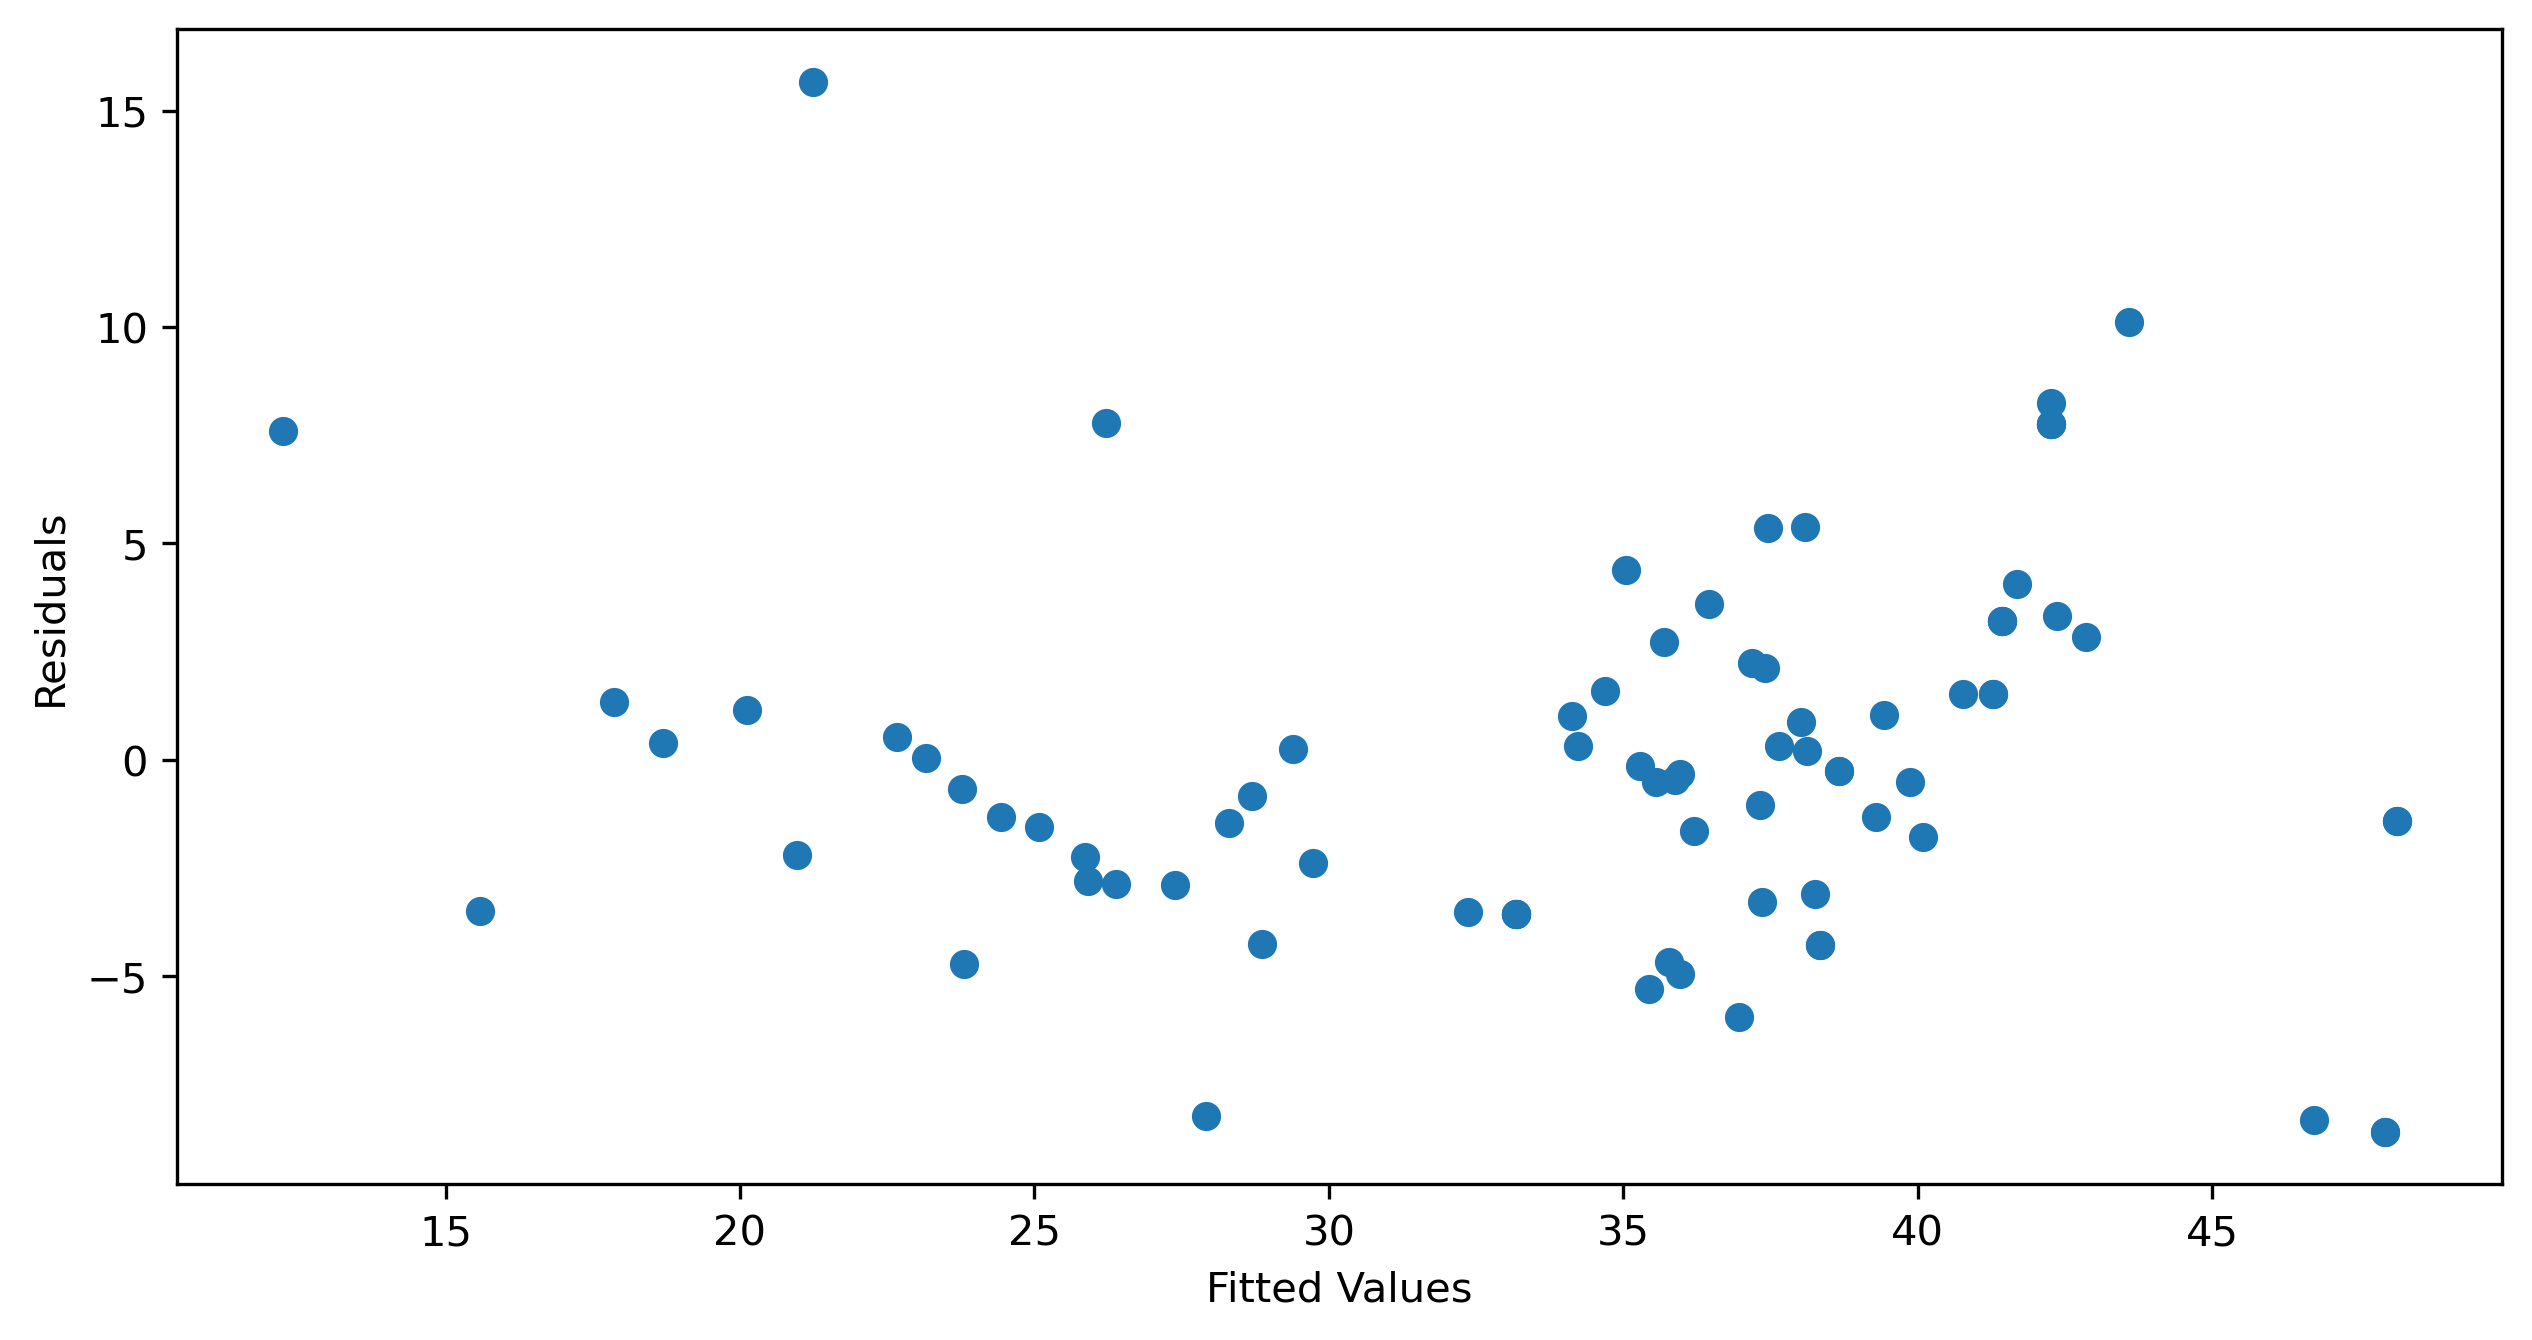

In [32]:
plt.scatter(vol.fittedvalues,vol.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# 3.Residual VS Regressor

eval_env: 1


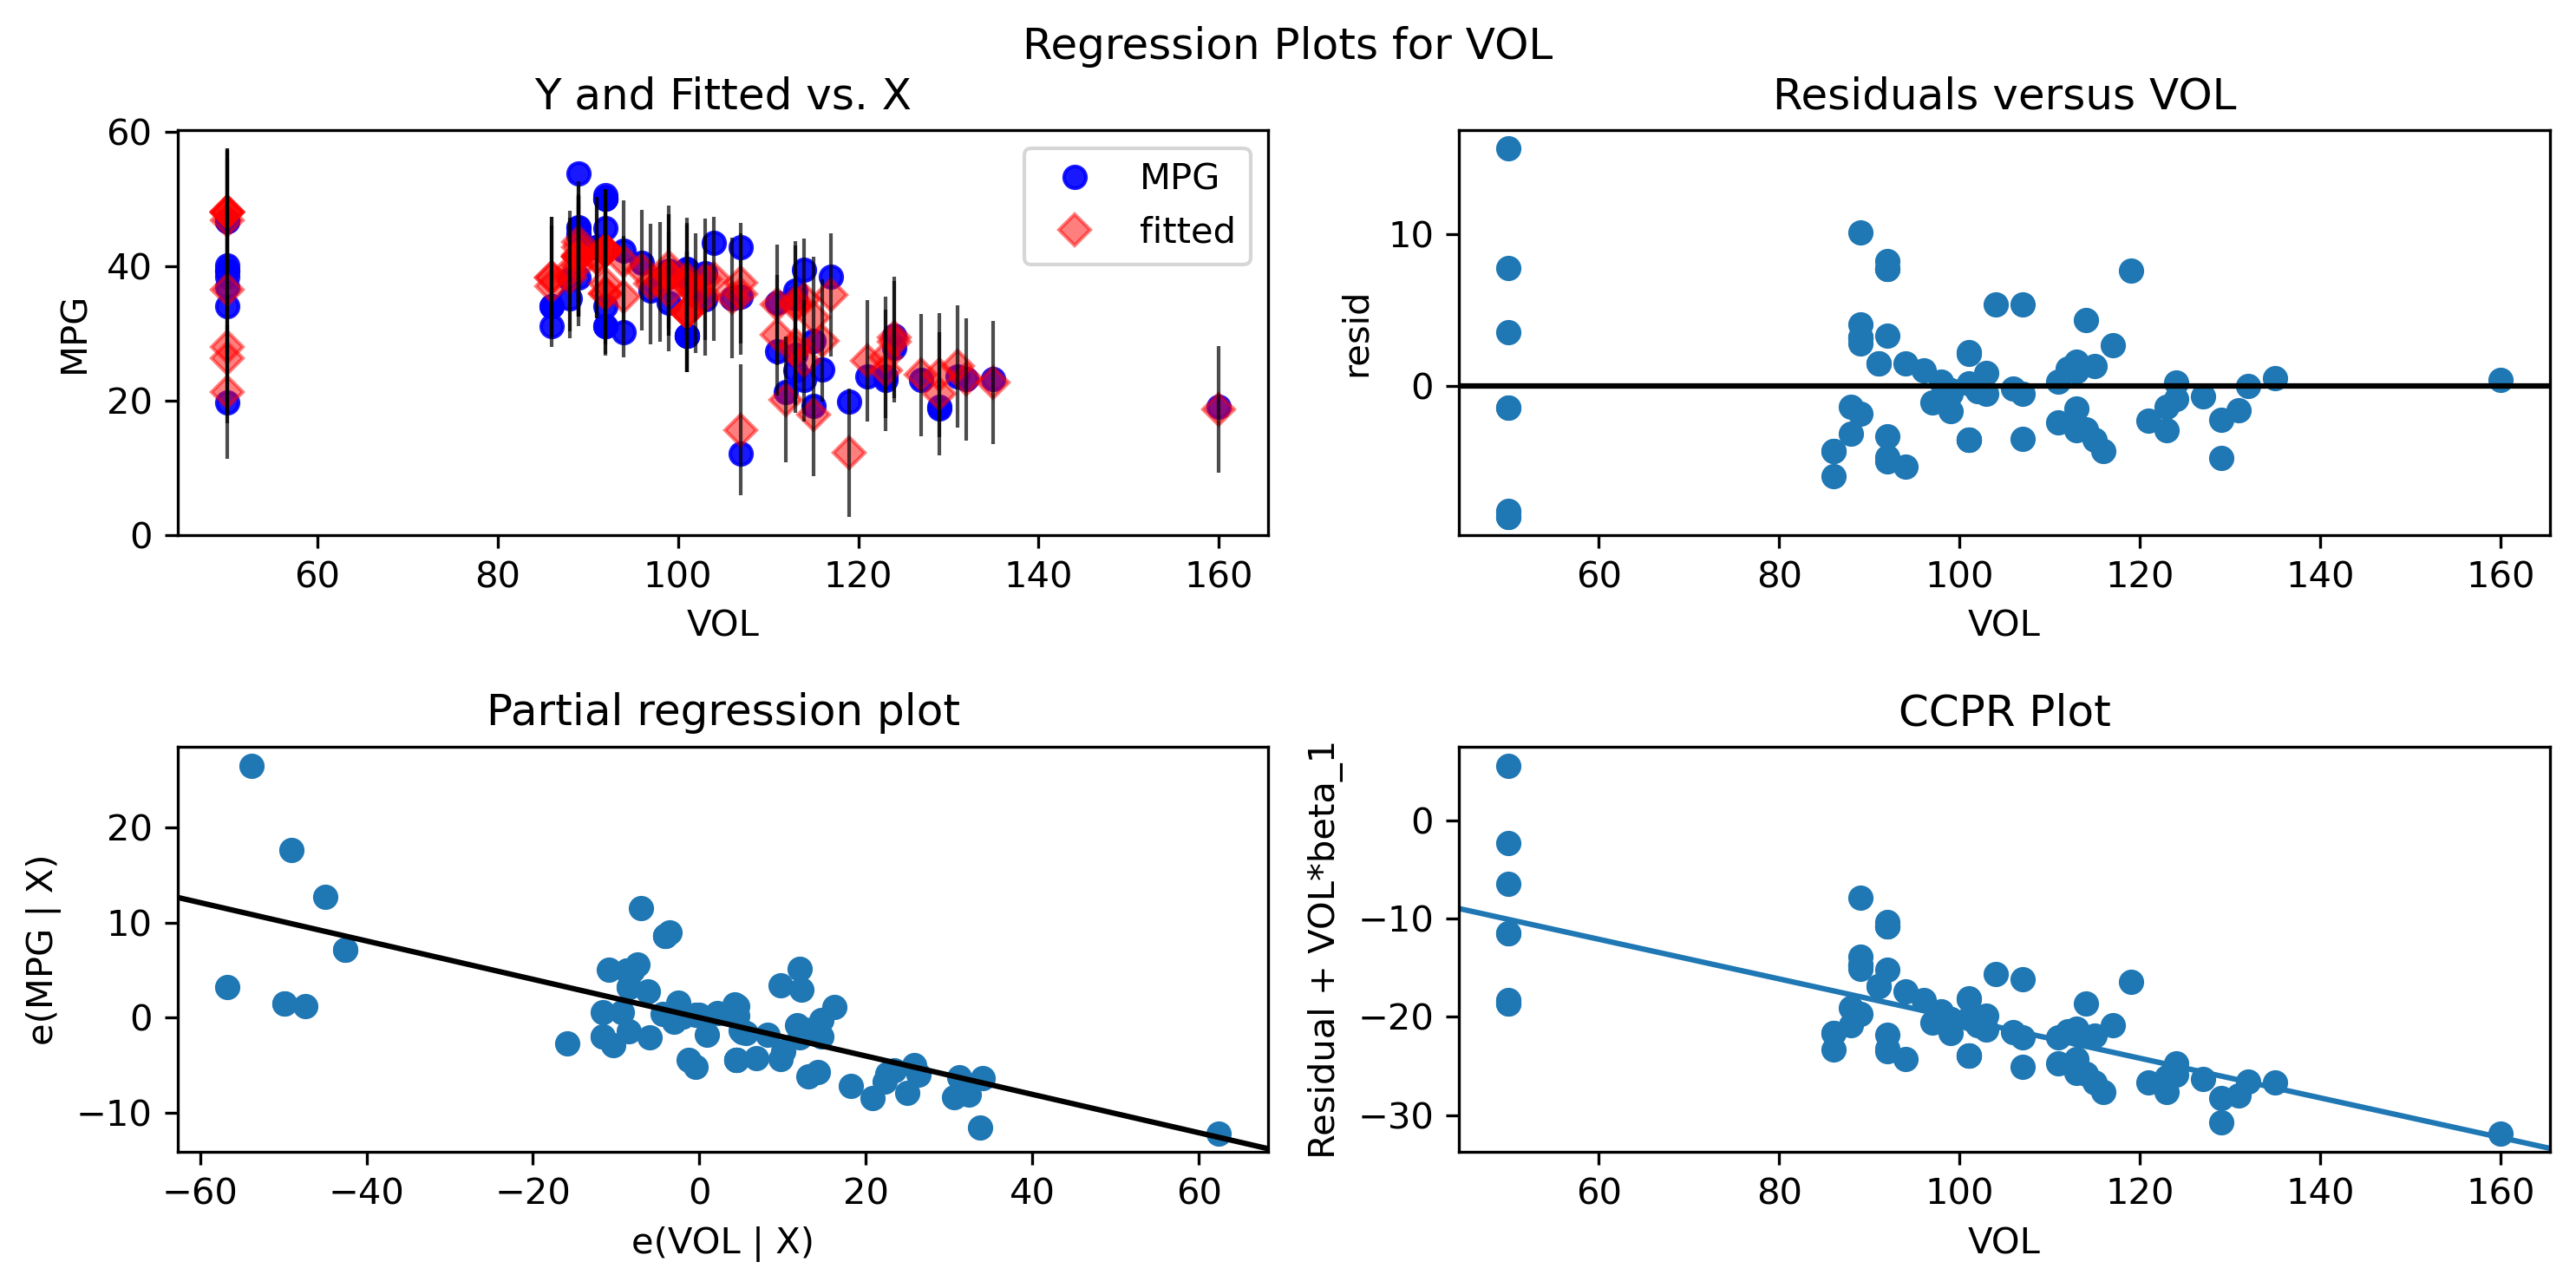

In [33]:
#Vol
sm.graphics.plot_regress_exog(vol,'VOL');

eval_env: 1


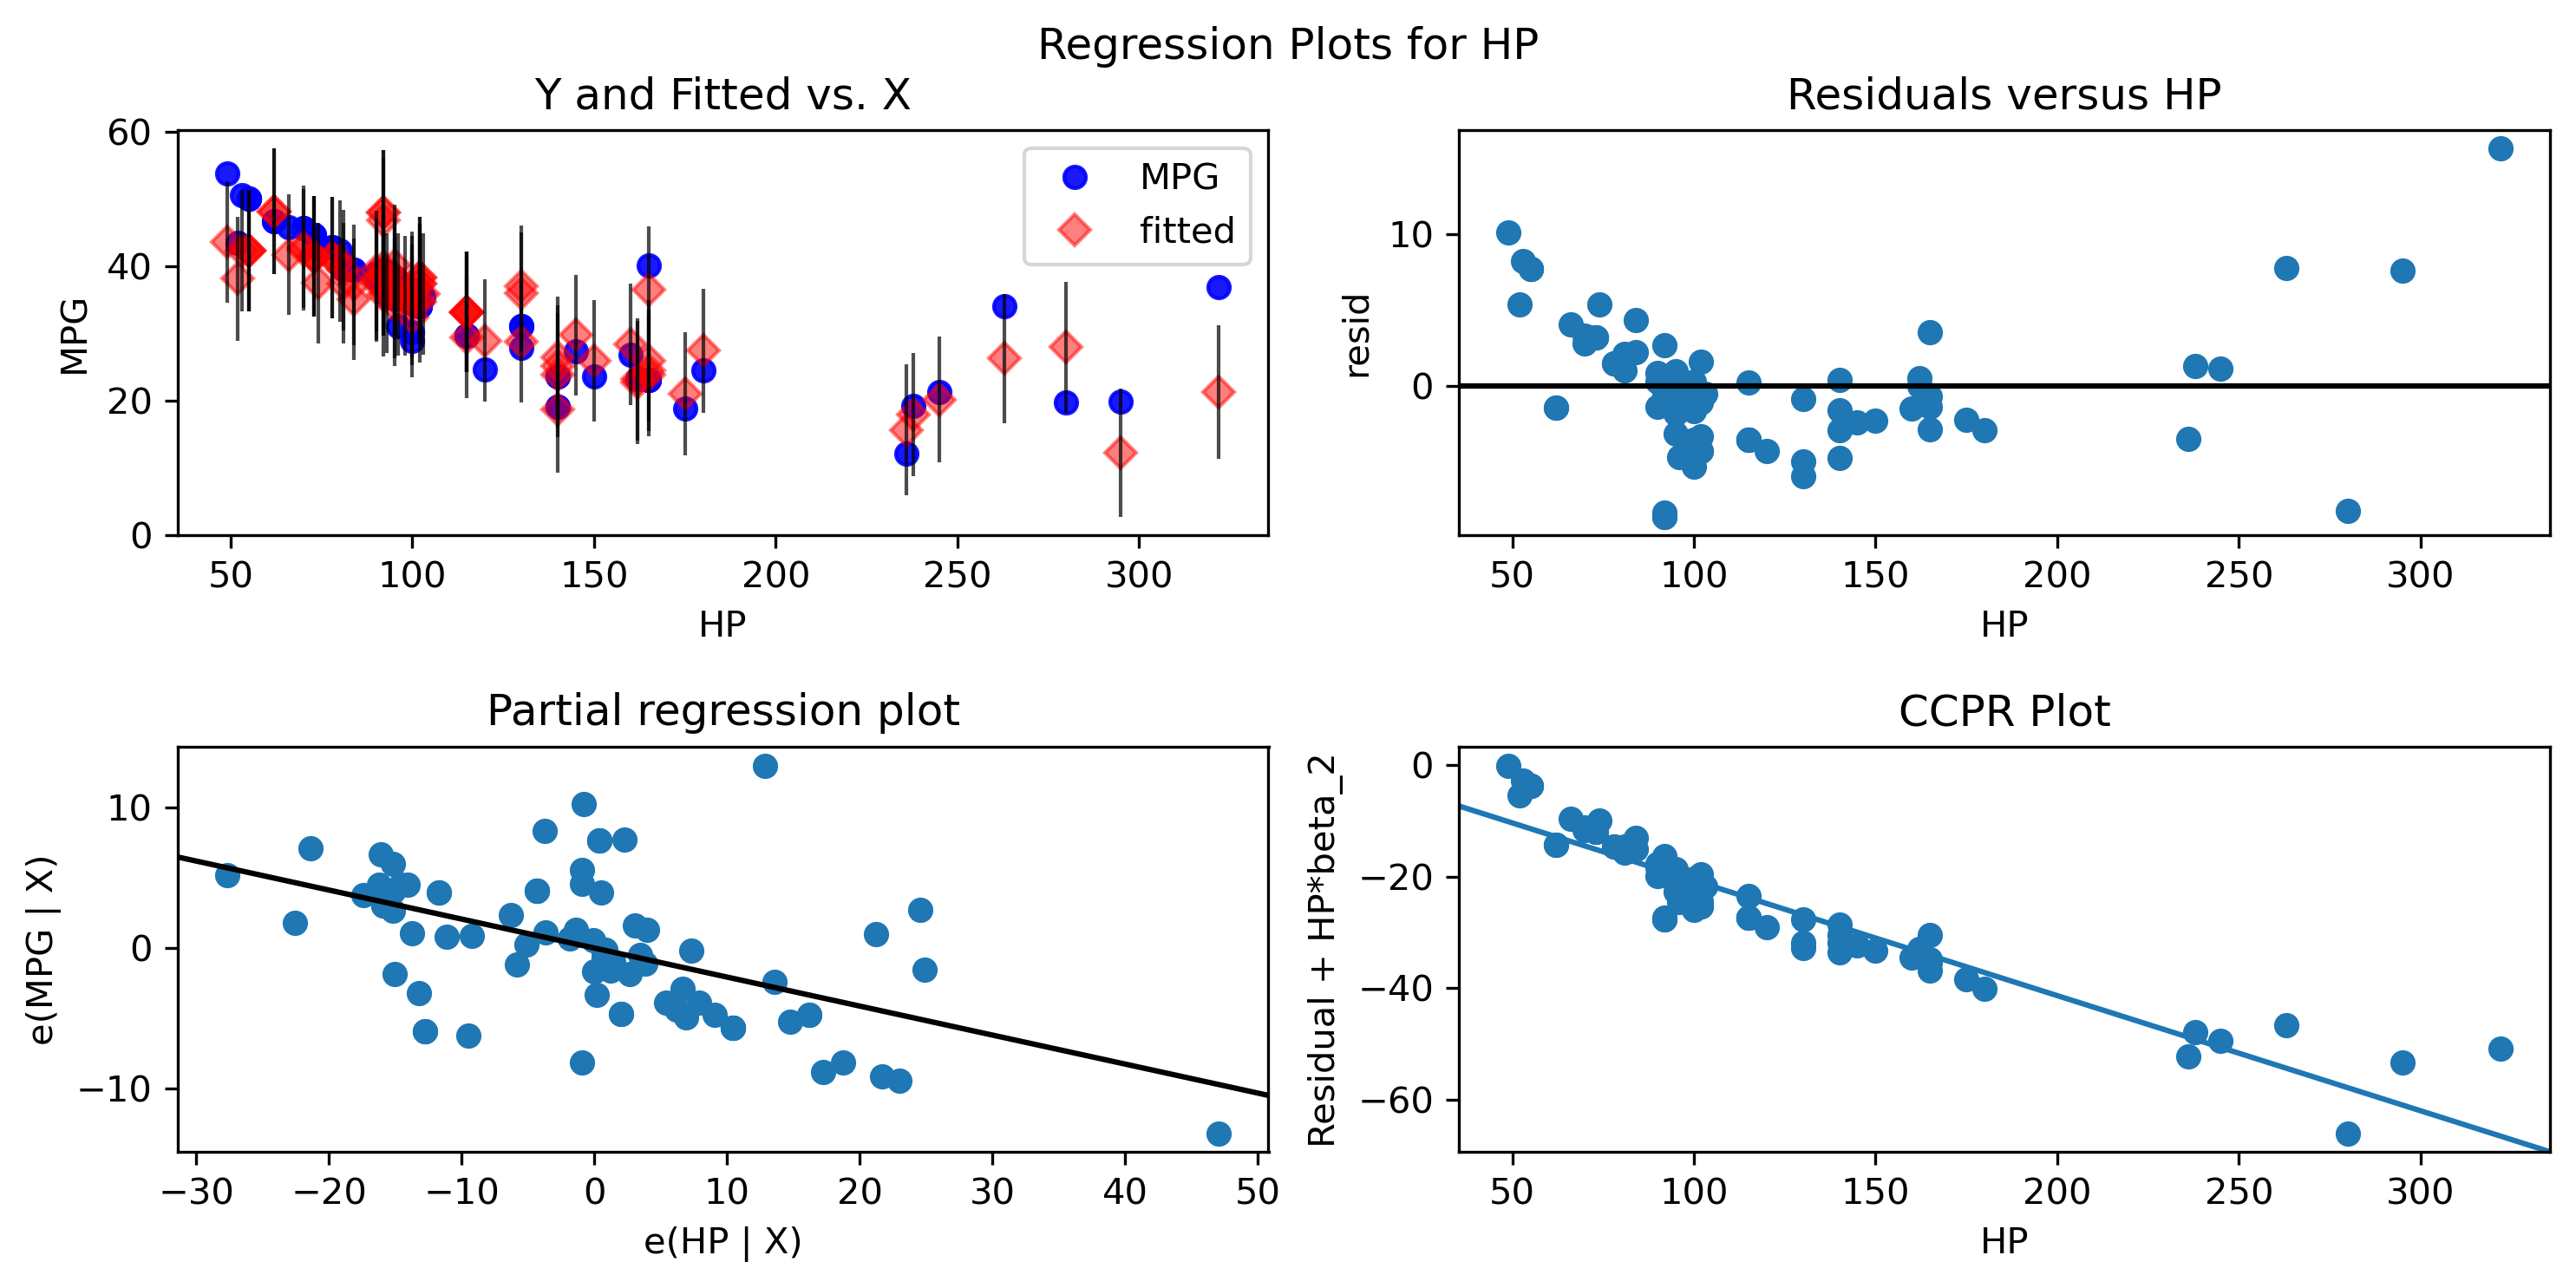

In [34]:
#Wt
sm.graphics.plot_regress_exog(vol,'HP');

eval_env: 1


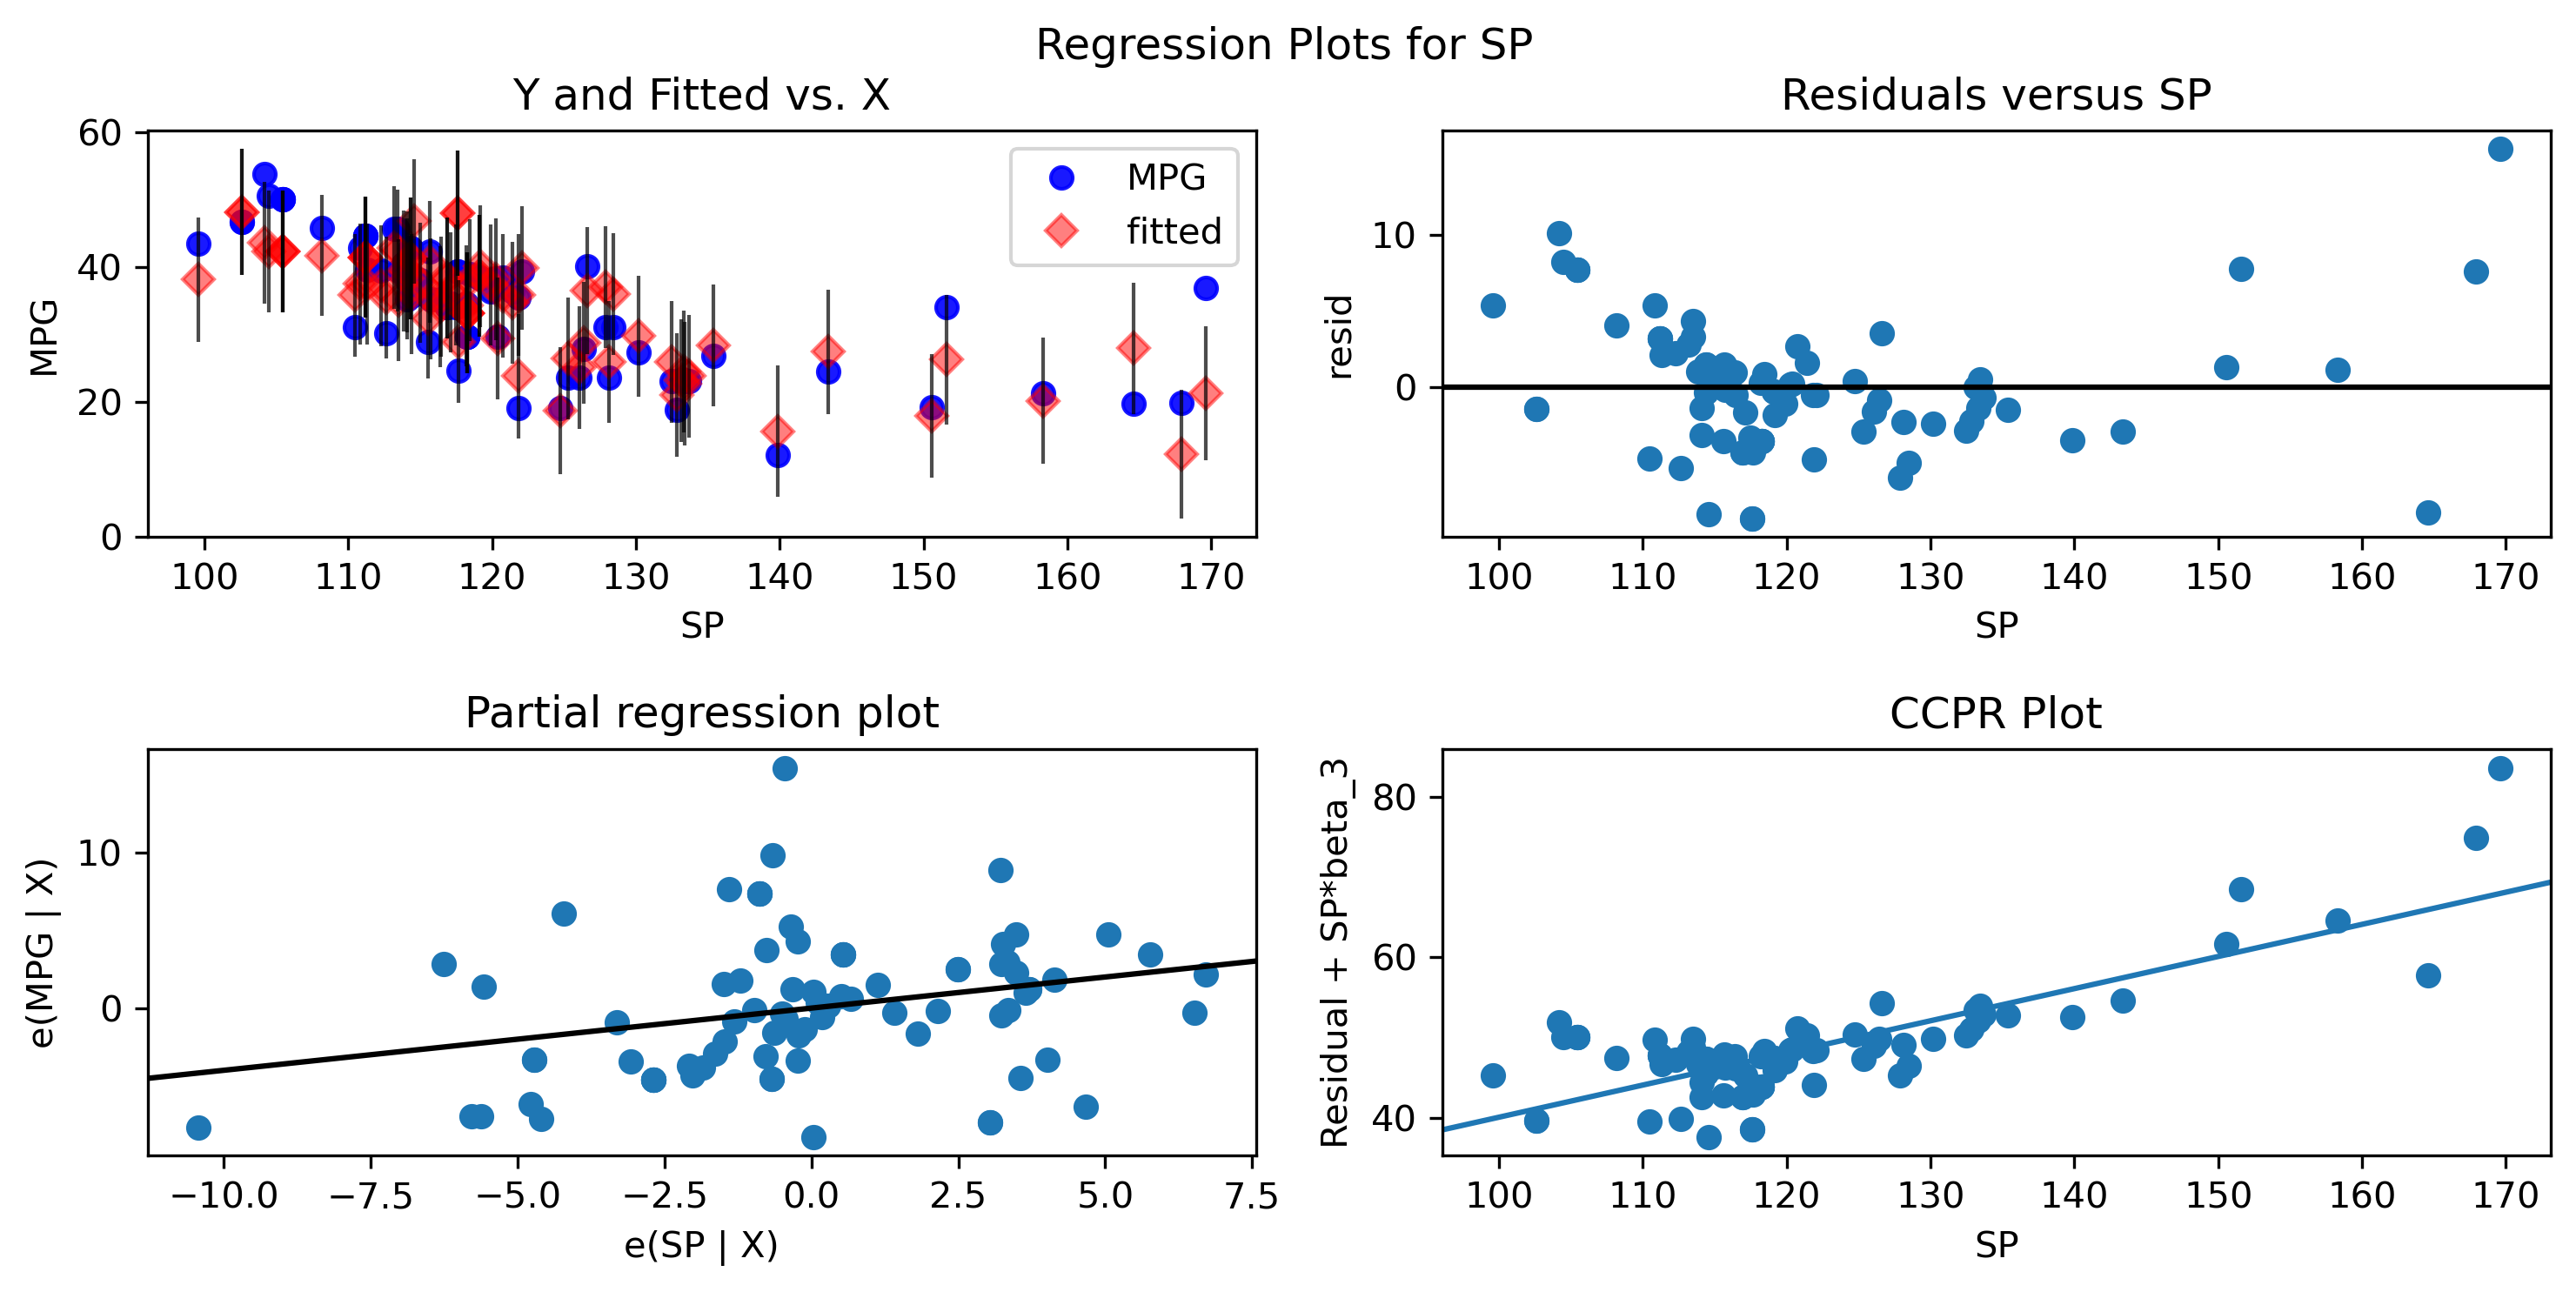

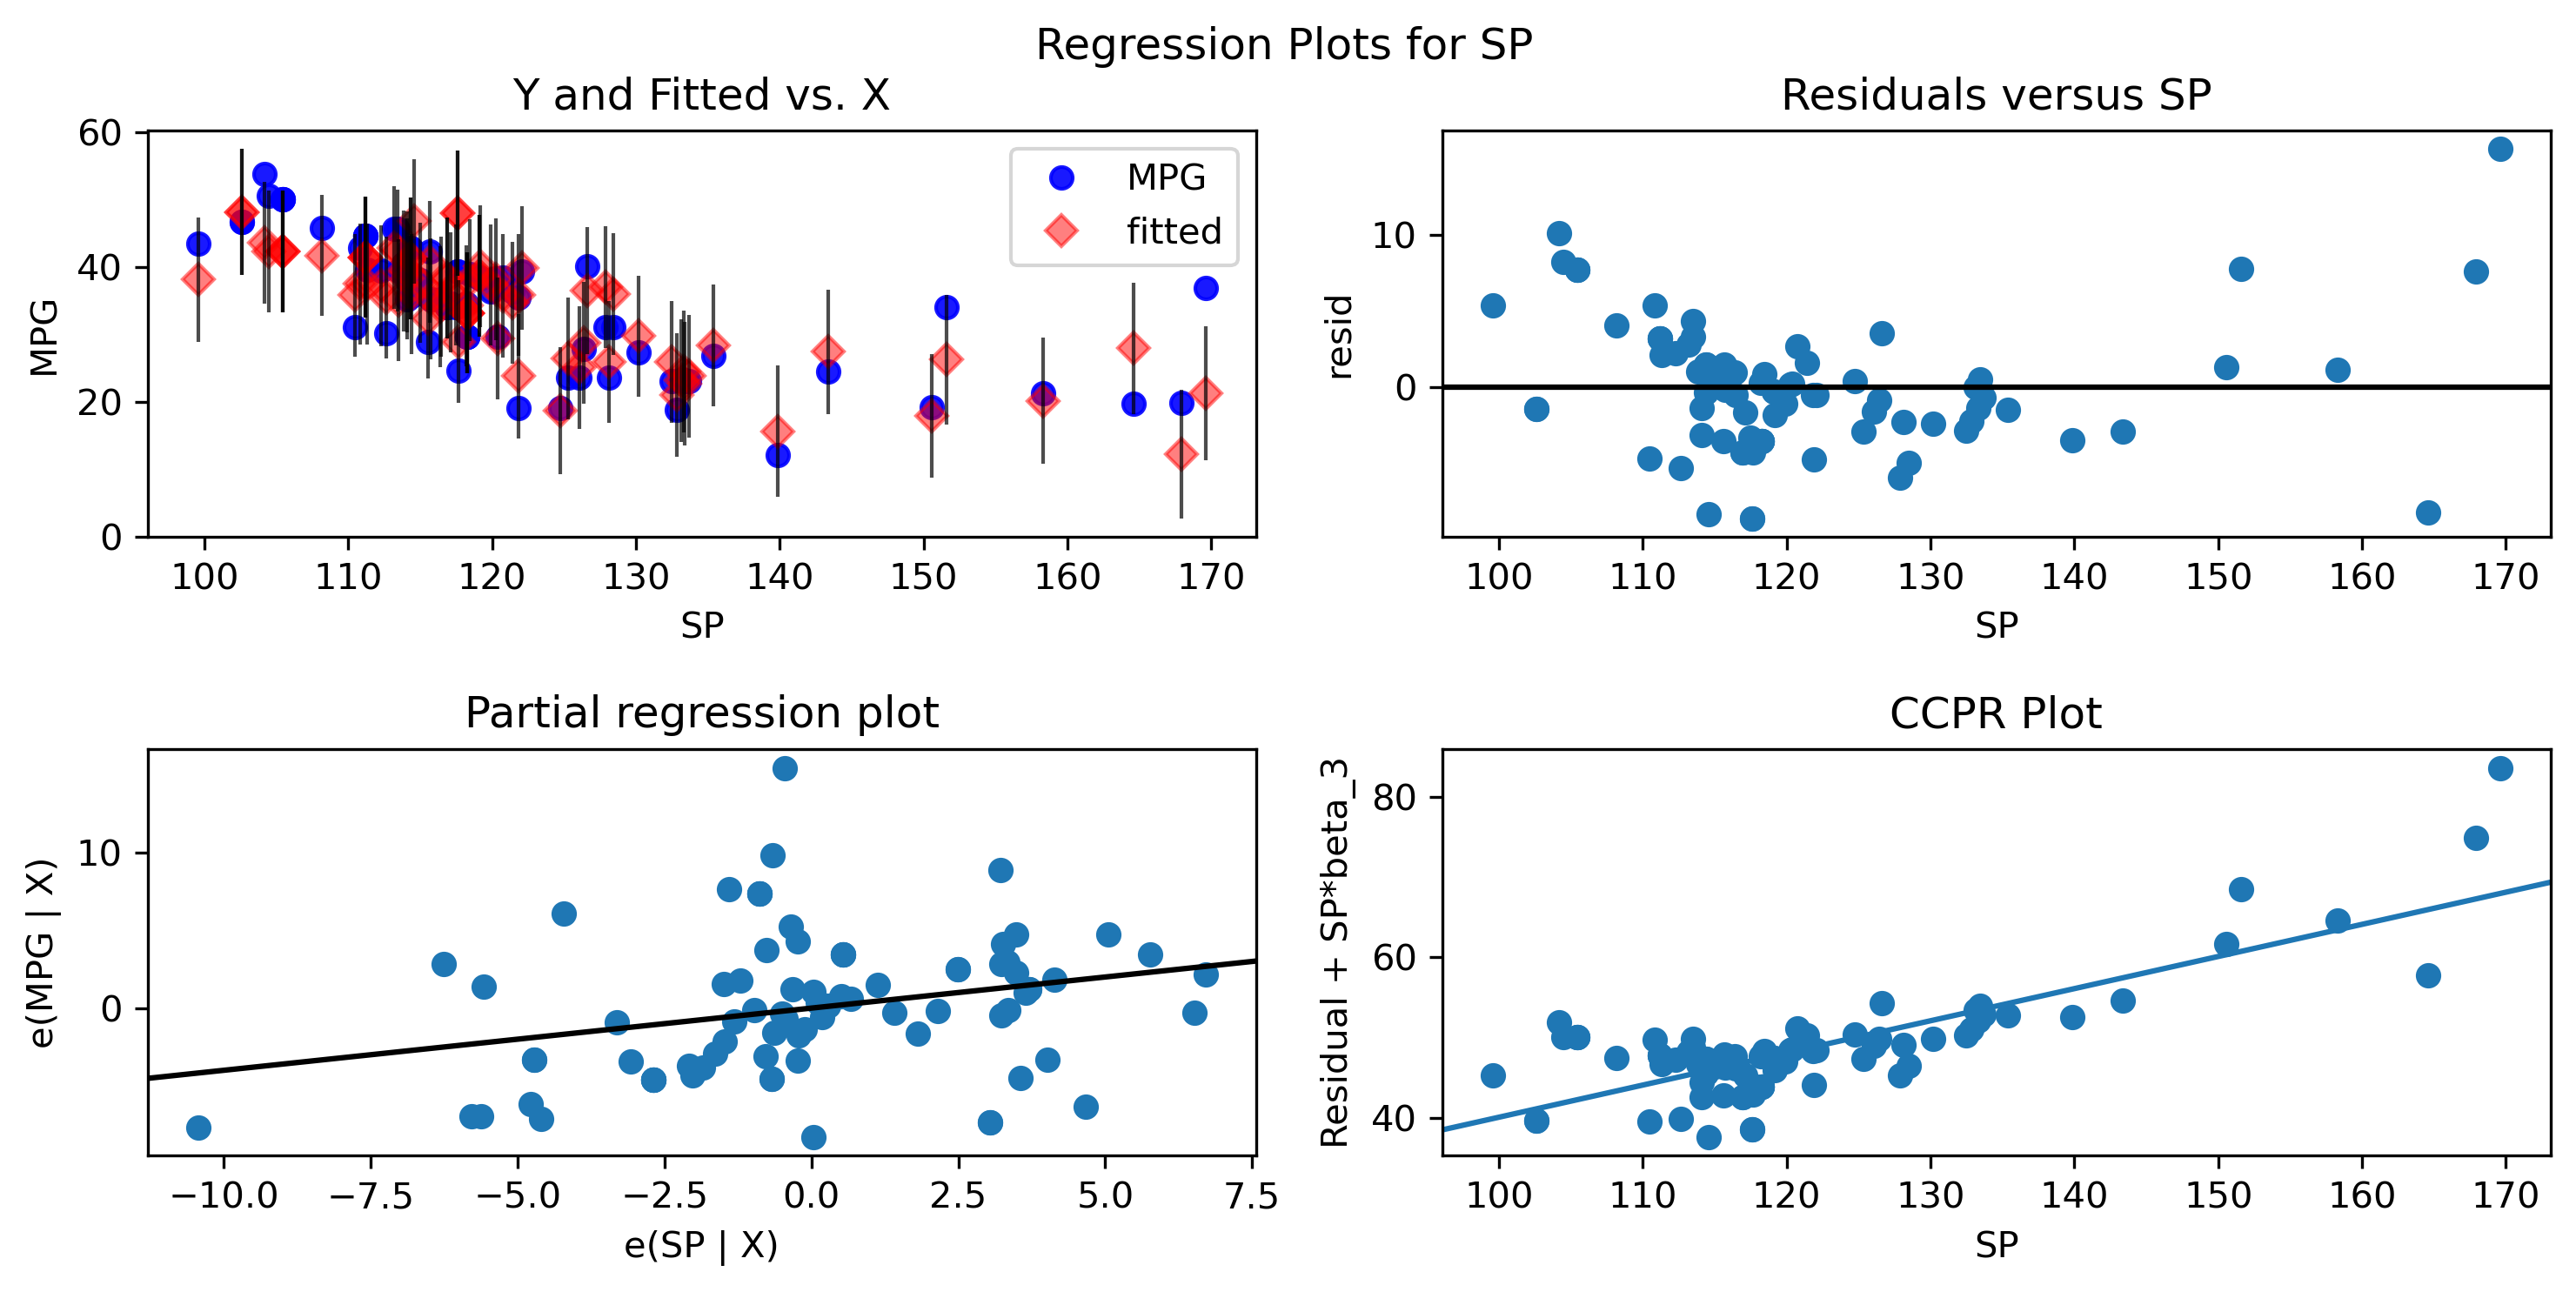

In [35]:
#Sp
sm.graphics.plot_regress_exog(vol,'SP')

eval_env: 1


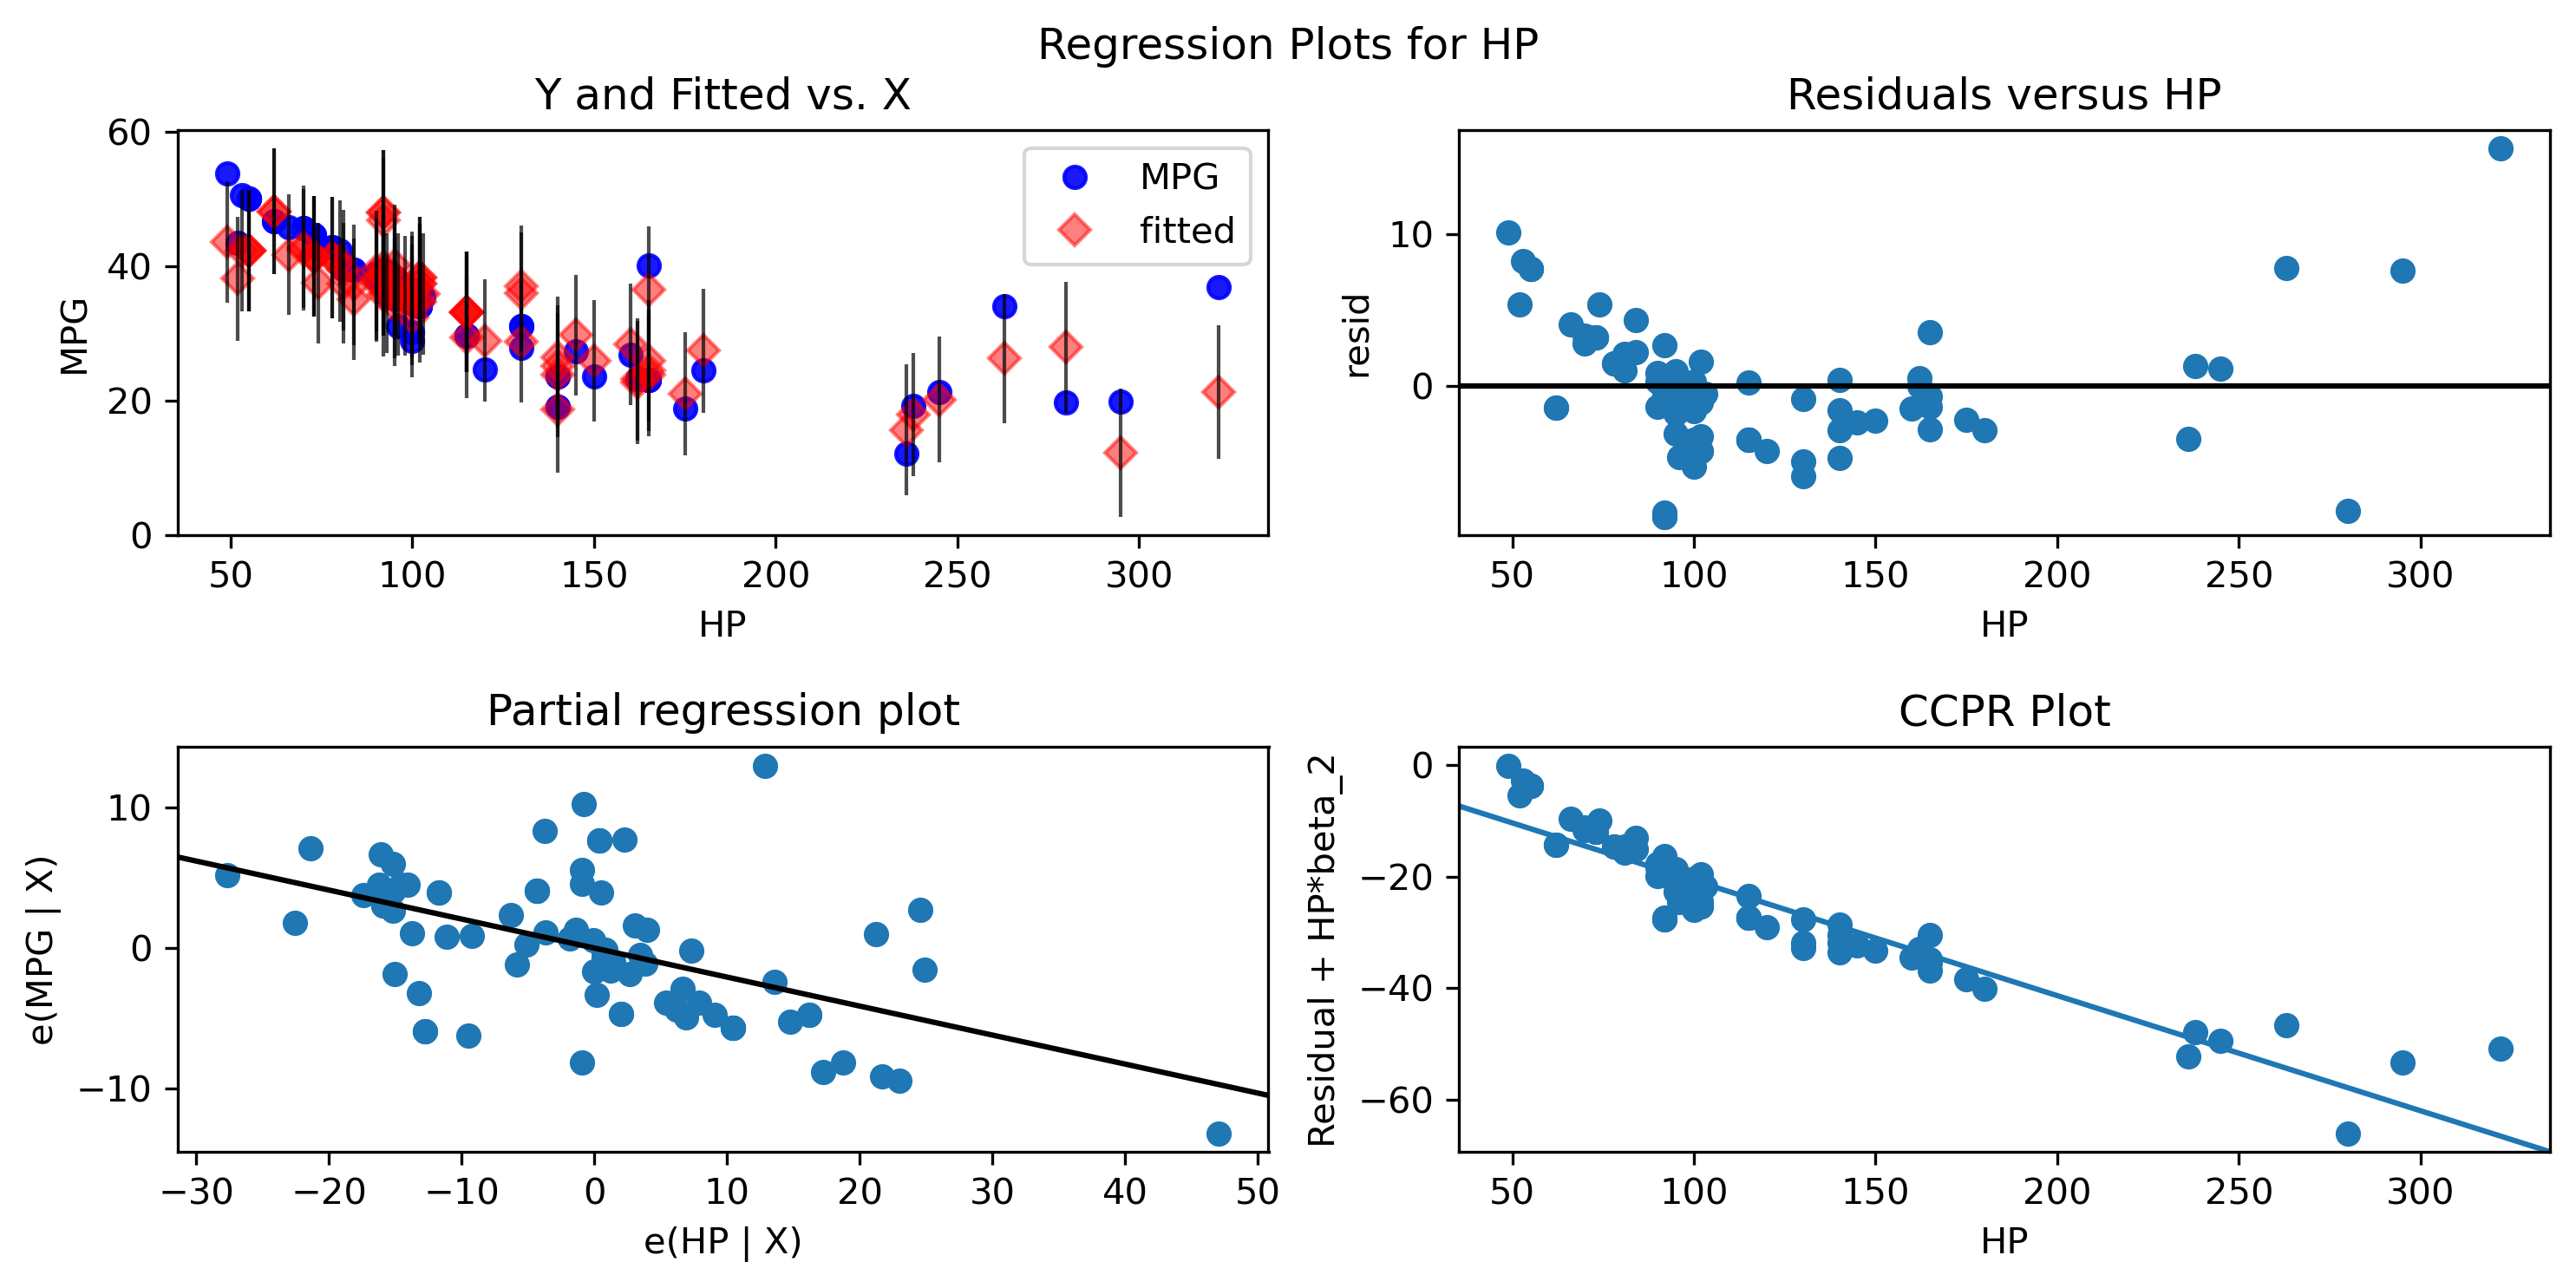

In [36]:
#Hp
sm.graphics.plot_regress_exog(vol,'HP');

# MODEL DELETION TECHNIQUES

# Cook's Distance
- Detecting influencers and outliers

In [37]:
model = smf.ols('MPG~VOL+SP+HP',data=df).fit()

In [38]:
inf = model.get_influence()
c,p = inf.cooks_distance
c

array([4.43781421e-02, 2.31439849e-02, 2.31439849e-02, 5.50743307e-03,
       2.84029117e-02, 3.89961849e-03, 2.31439849e-02, 3.39659293e-03,
       3.39659293e-03, 9.67532550e-04, 3.00465895e-03, 9.32152031e-02,
       2.65177317e-04, 3.00465895e-03, 5.41784561e-03, 3.00465895e-03,
       8.22731925e-04, 9.32152031e-02, 8.22731925e-04, 3.21833541e-04,
       2.70620733e-05, 8.34770054e-03, 1.83348025e-05, 2.72860299e-04,
       1.23307010e-03, 7.41312614e-02, 5.71759163e-03, 2.70620733e-05,
       3.33387970e-02, 9.21393948e-05, 5.93913831e-03, 1.23367282e-03,
       2.67864467e-04, 1.10555542e-03, 1.21312479e-03, 2.01774924e-05,
       4.19374936e-04, 4.18657710e-03, 4.18657710e-03, 1.12077324e-02,
       2.70424384e-04, 3.80042521e-06, 1.99290460e-03, 2.64674273e-03,
       2.22196543e-05, 4.76293133e-04, 2.58868946e-05, 4.92204073e-05,
       1.55796817e-02, 3.53143210e-03, 3.53143210e-03, 3.53143210e-03,
       2.30754944e-05, 1.04055062e-02, 1.07199598e-03, 2.89811901e-04,
      

<StemContainer object of 3 artists>

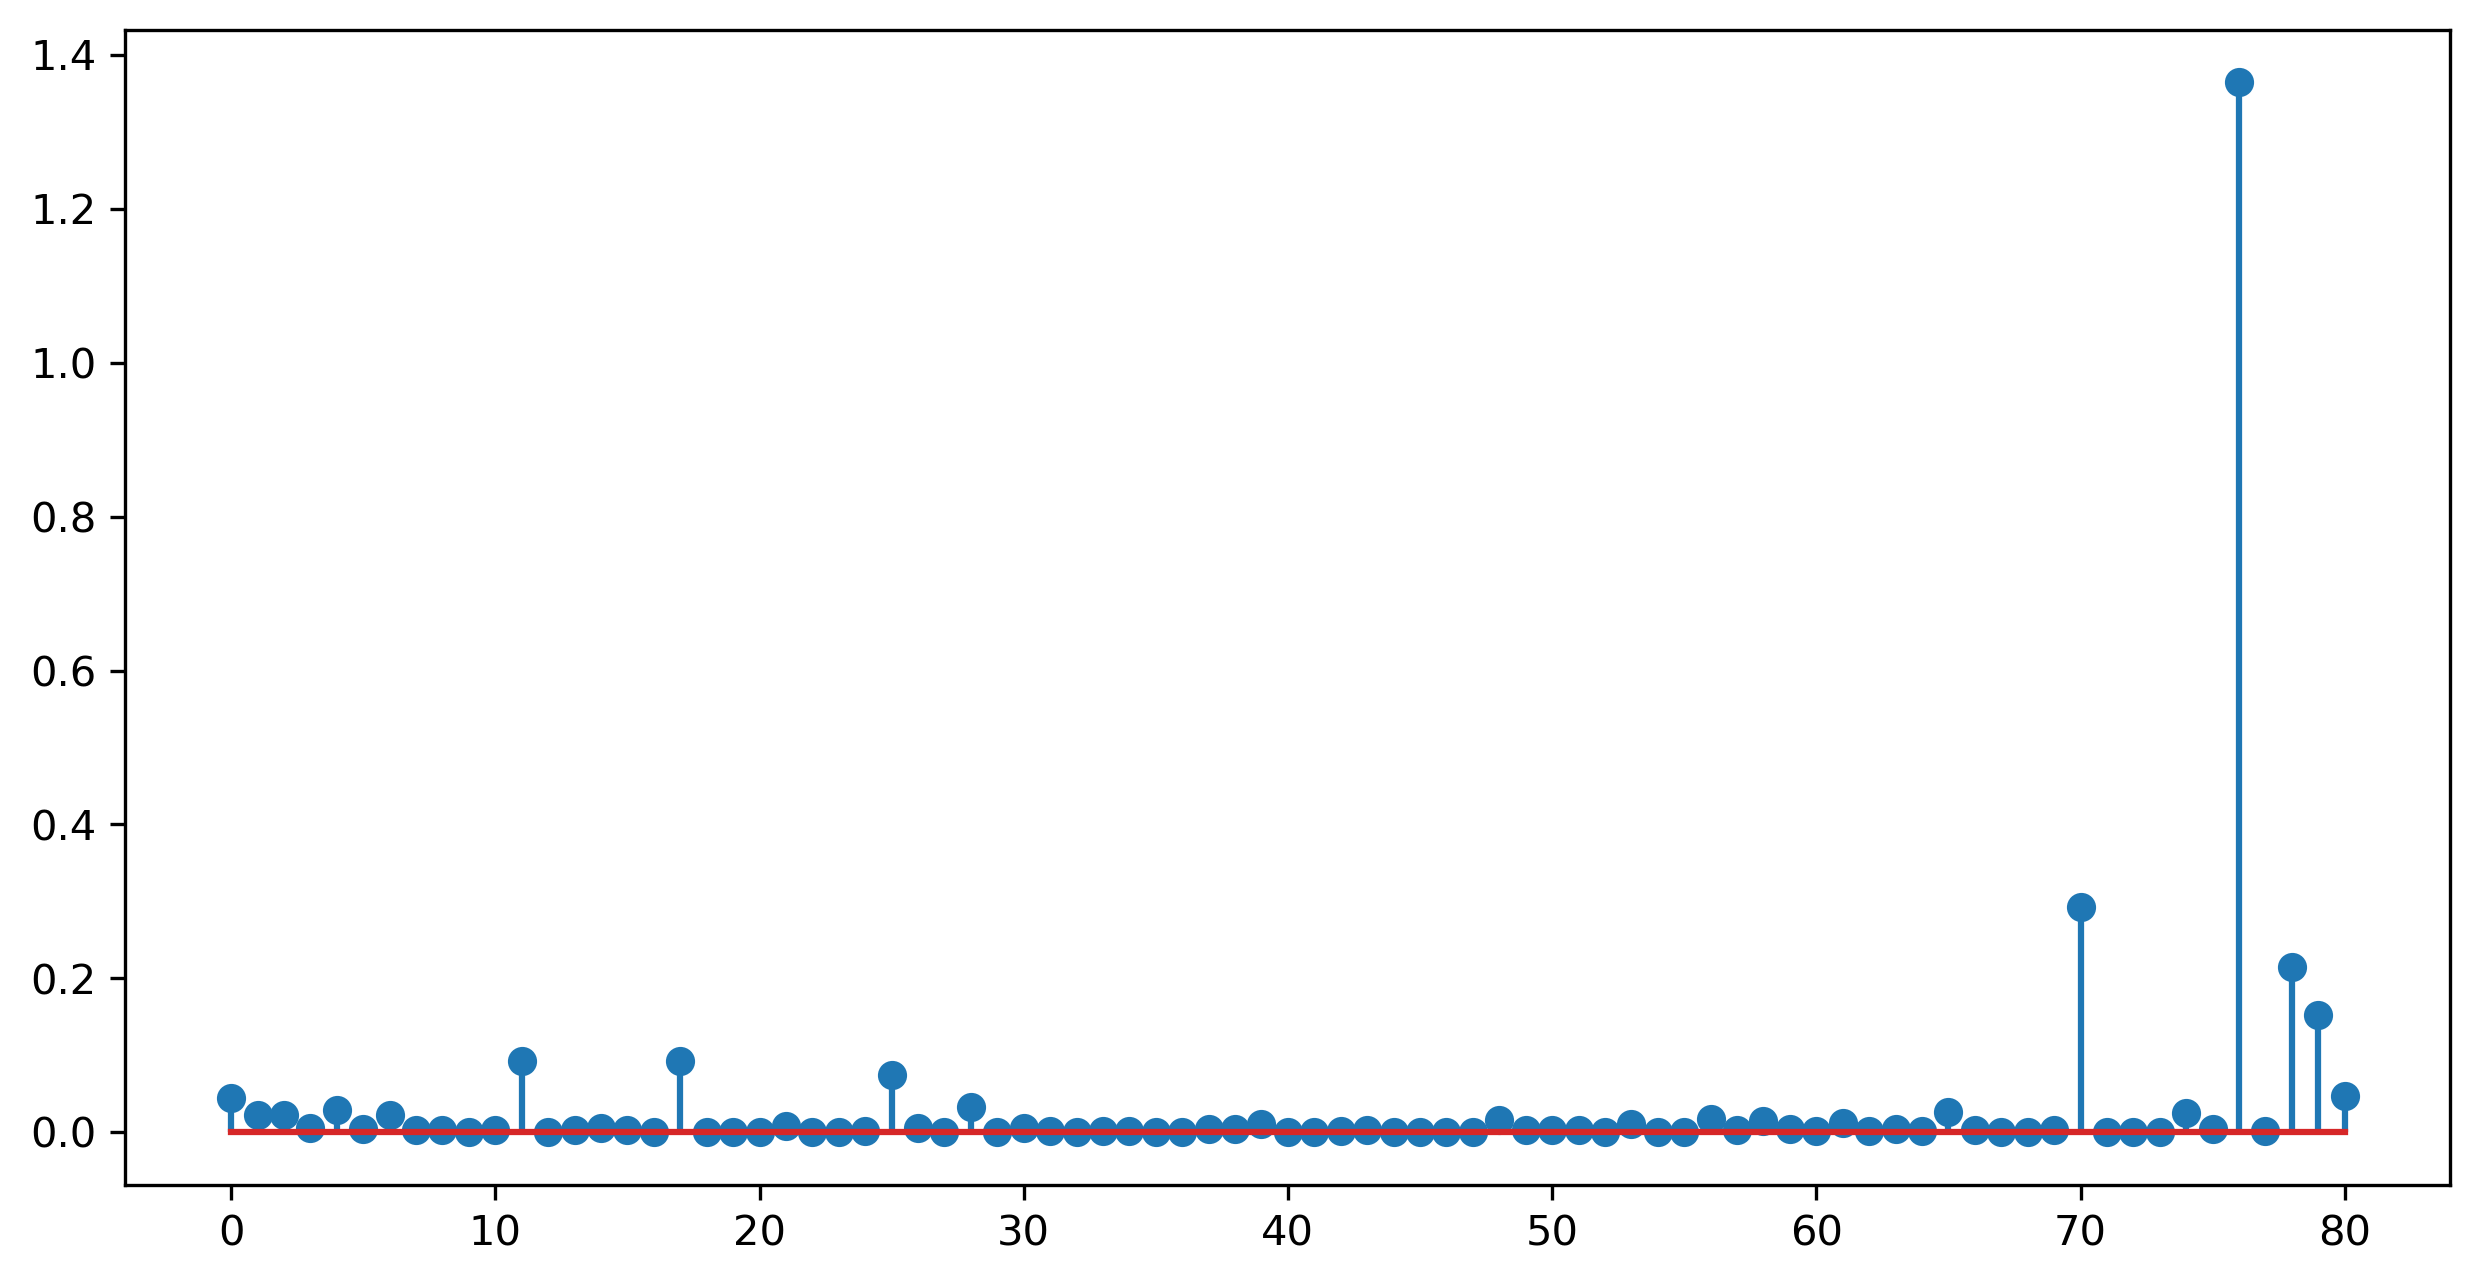

In [39]:
# Cook's distance plot
plt.stem(range(len(df)),c)

In [40]:
len(df)

81

In [41]:
np.argmax(c), np.max(c)

(76, 1.3641743869103404)

In [42]:
df.iloc[[76]]

,HP,MPG,VOL,SP,WT
76,322,36.9,50,169.598513,16.132947


In [43]:
df.head(5)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [44]:
df.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [45]:
#Calculate cutoff

k = len(df.columns)
n = len(df)

cut_off = 3*(k+1)/n
cut_off

0.2222222222222222

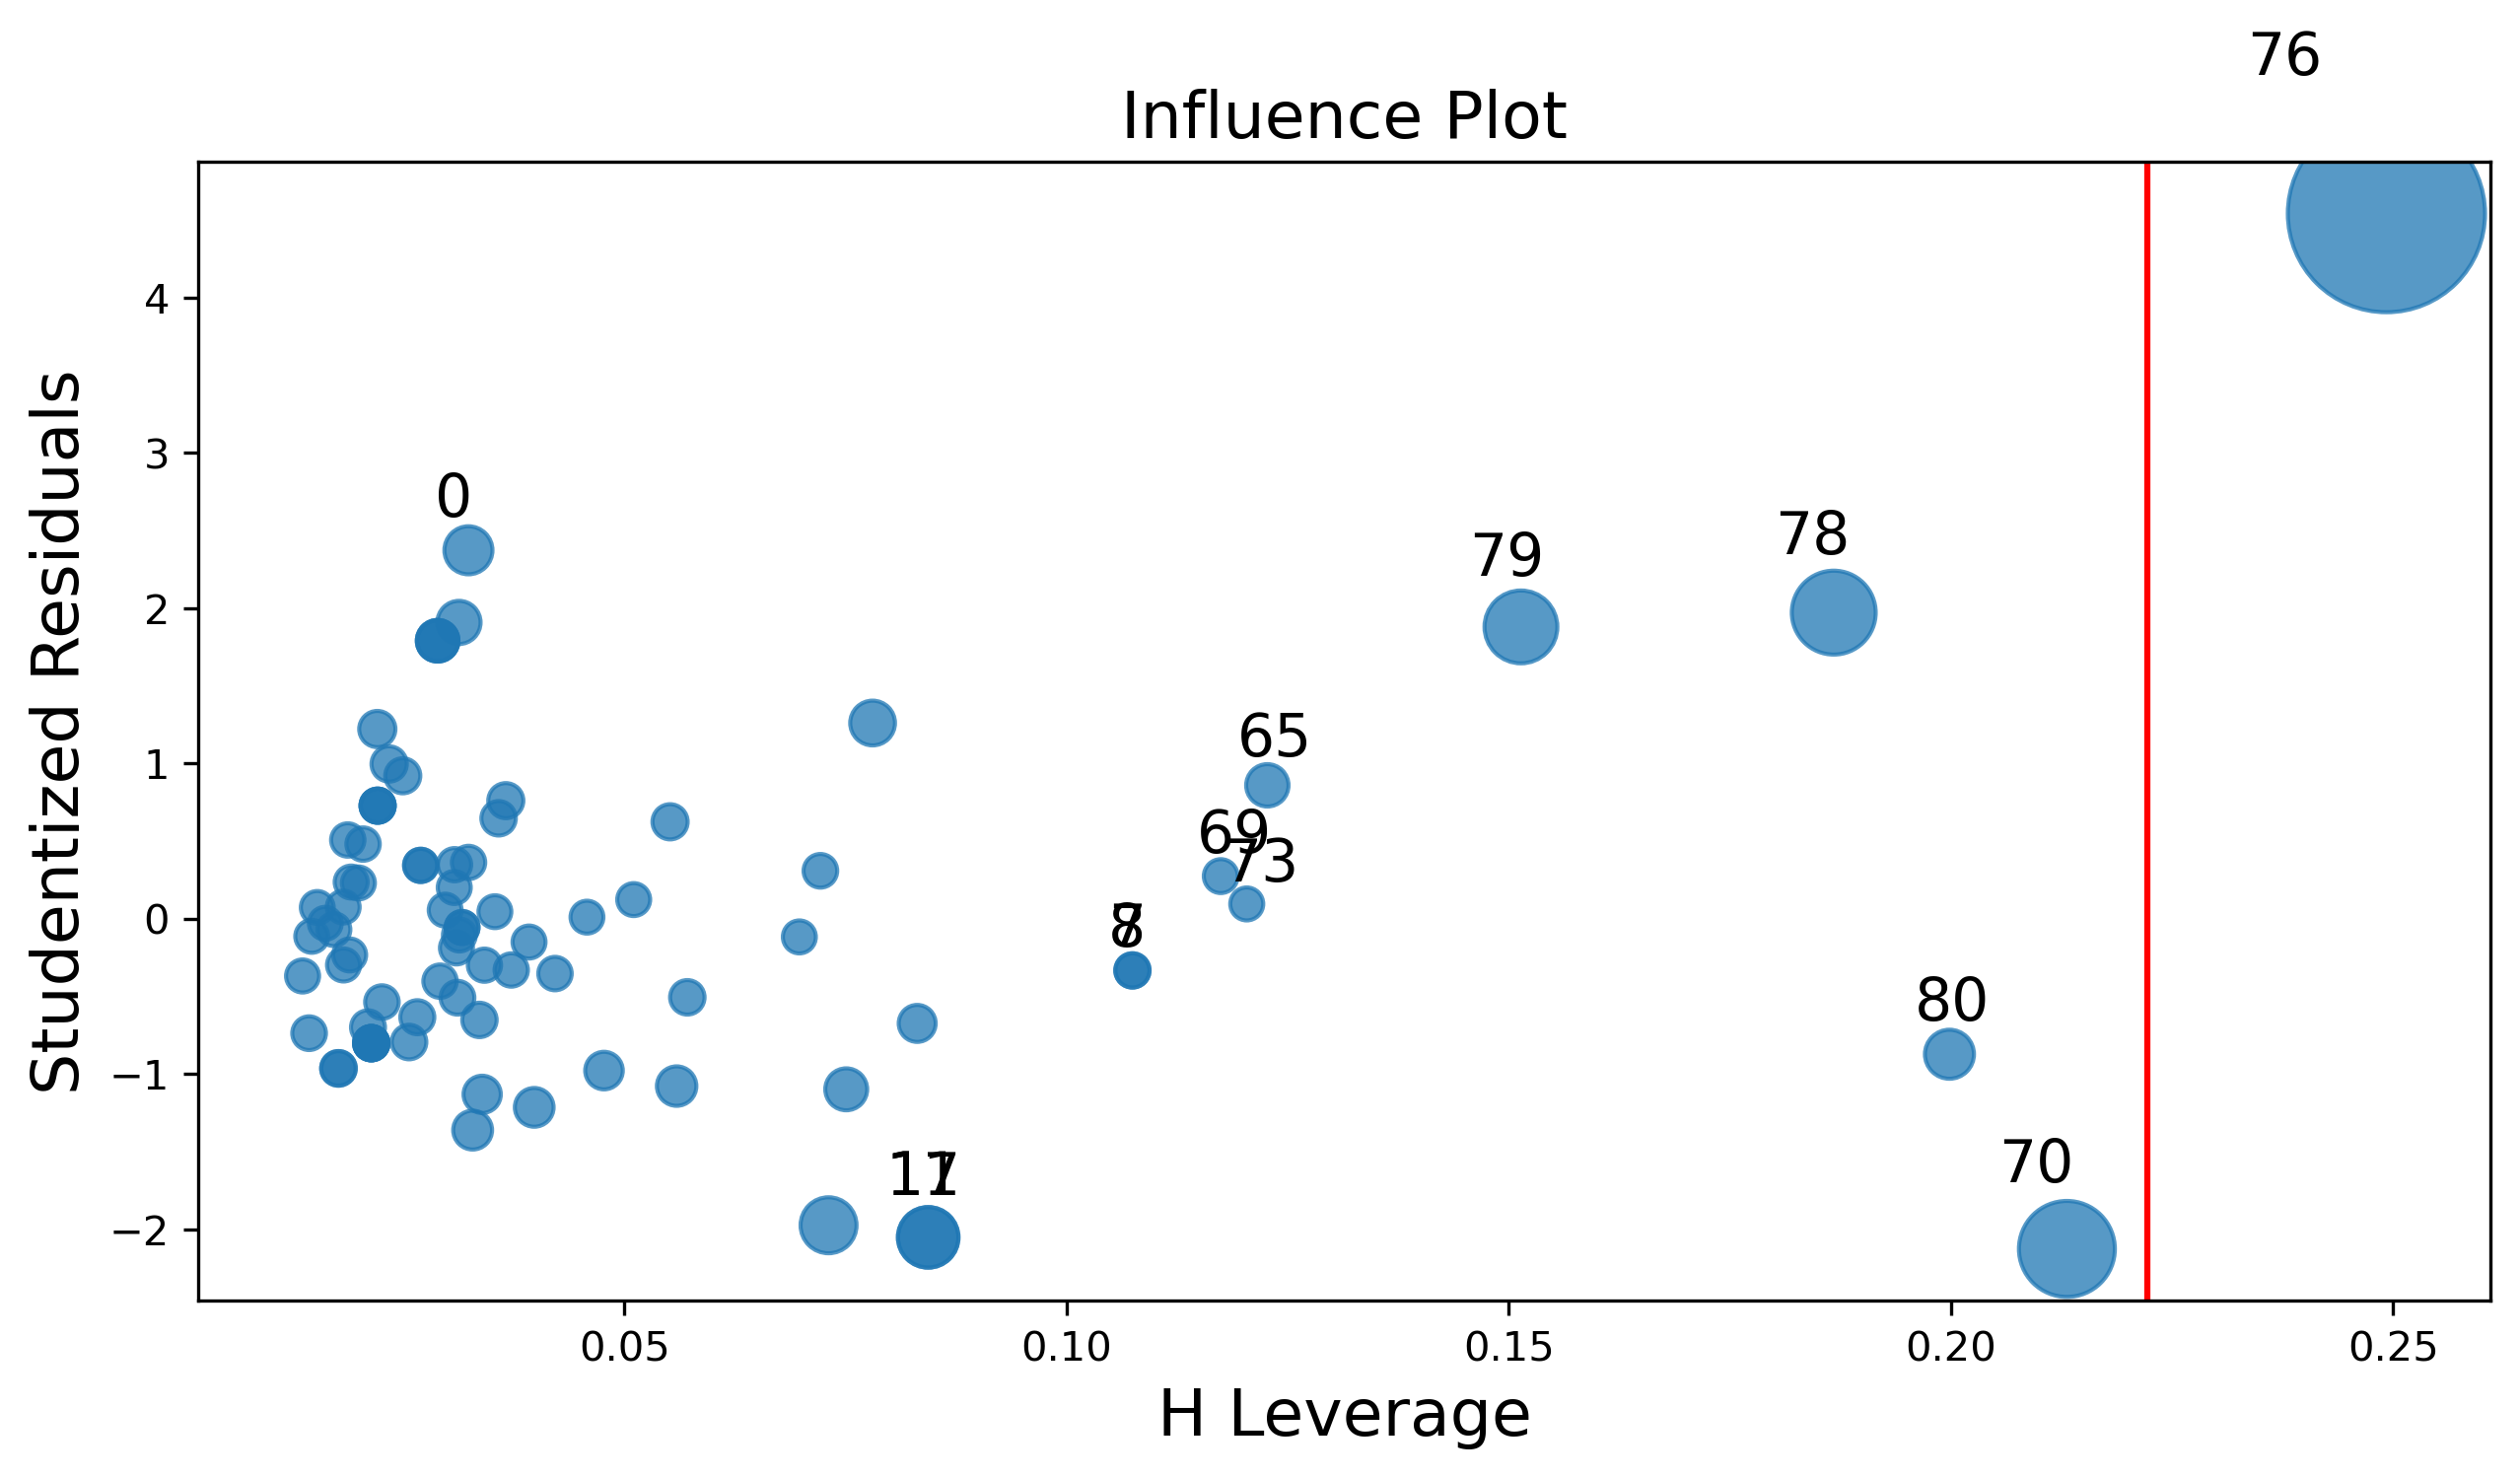

In [46]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model);
plt.axvline(cut_off,color = 'r')

# Improving the model

In [47]:
df.drop(index=[76], inplace=True)

In [48]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [49]:
#reset the index
df.reset_index(inplace=True)
df

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
75,75,175,18.762837,129,132.864163,42.778219
76,77,238,19.197888,115,150.576579,37.923113
77,78,263,34.000000,50,151.598513,15.769625
78,79,295,19.833733,119,167.944460,39.423099


In [50]:
df.drop(columns=['index'], inplace=True)
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
76,238,19.197888,115,150.576579,37.923113
77,263,34.000000,50,151.598513,15.769625
78,295,19.833733,119,167.944460,39.423099


In [51]:
model = smf.ols('MPG~HP+SP+VOL',data=df).fit()

inf = model.get_influence()
c,p = inf.cooks_distance

<StemContainer object of 3 artists>

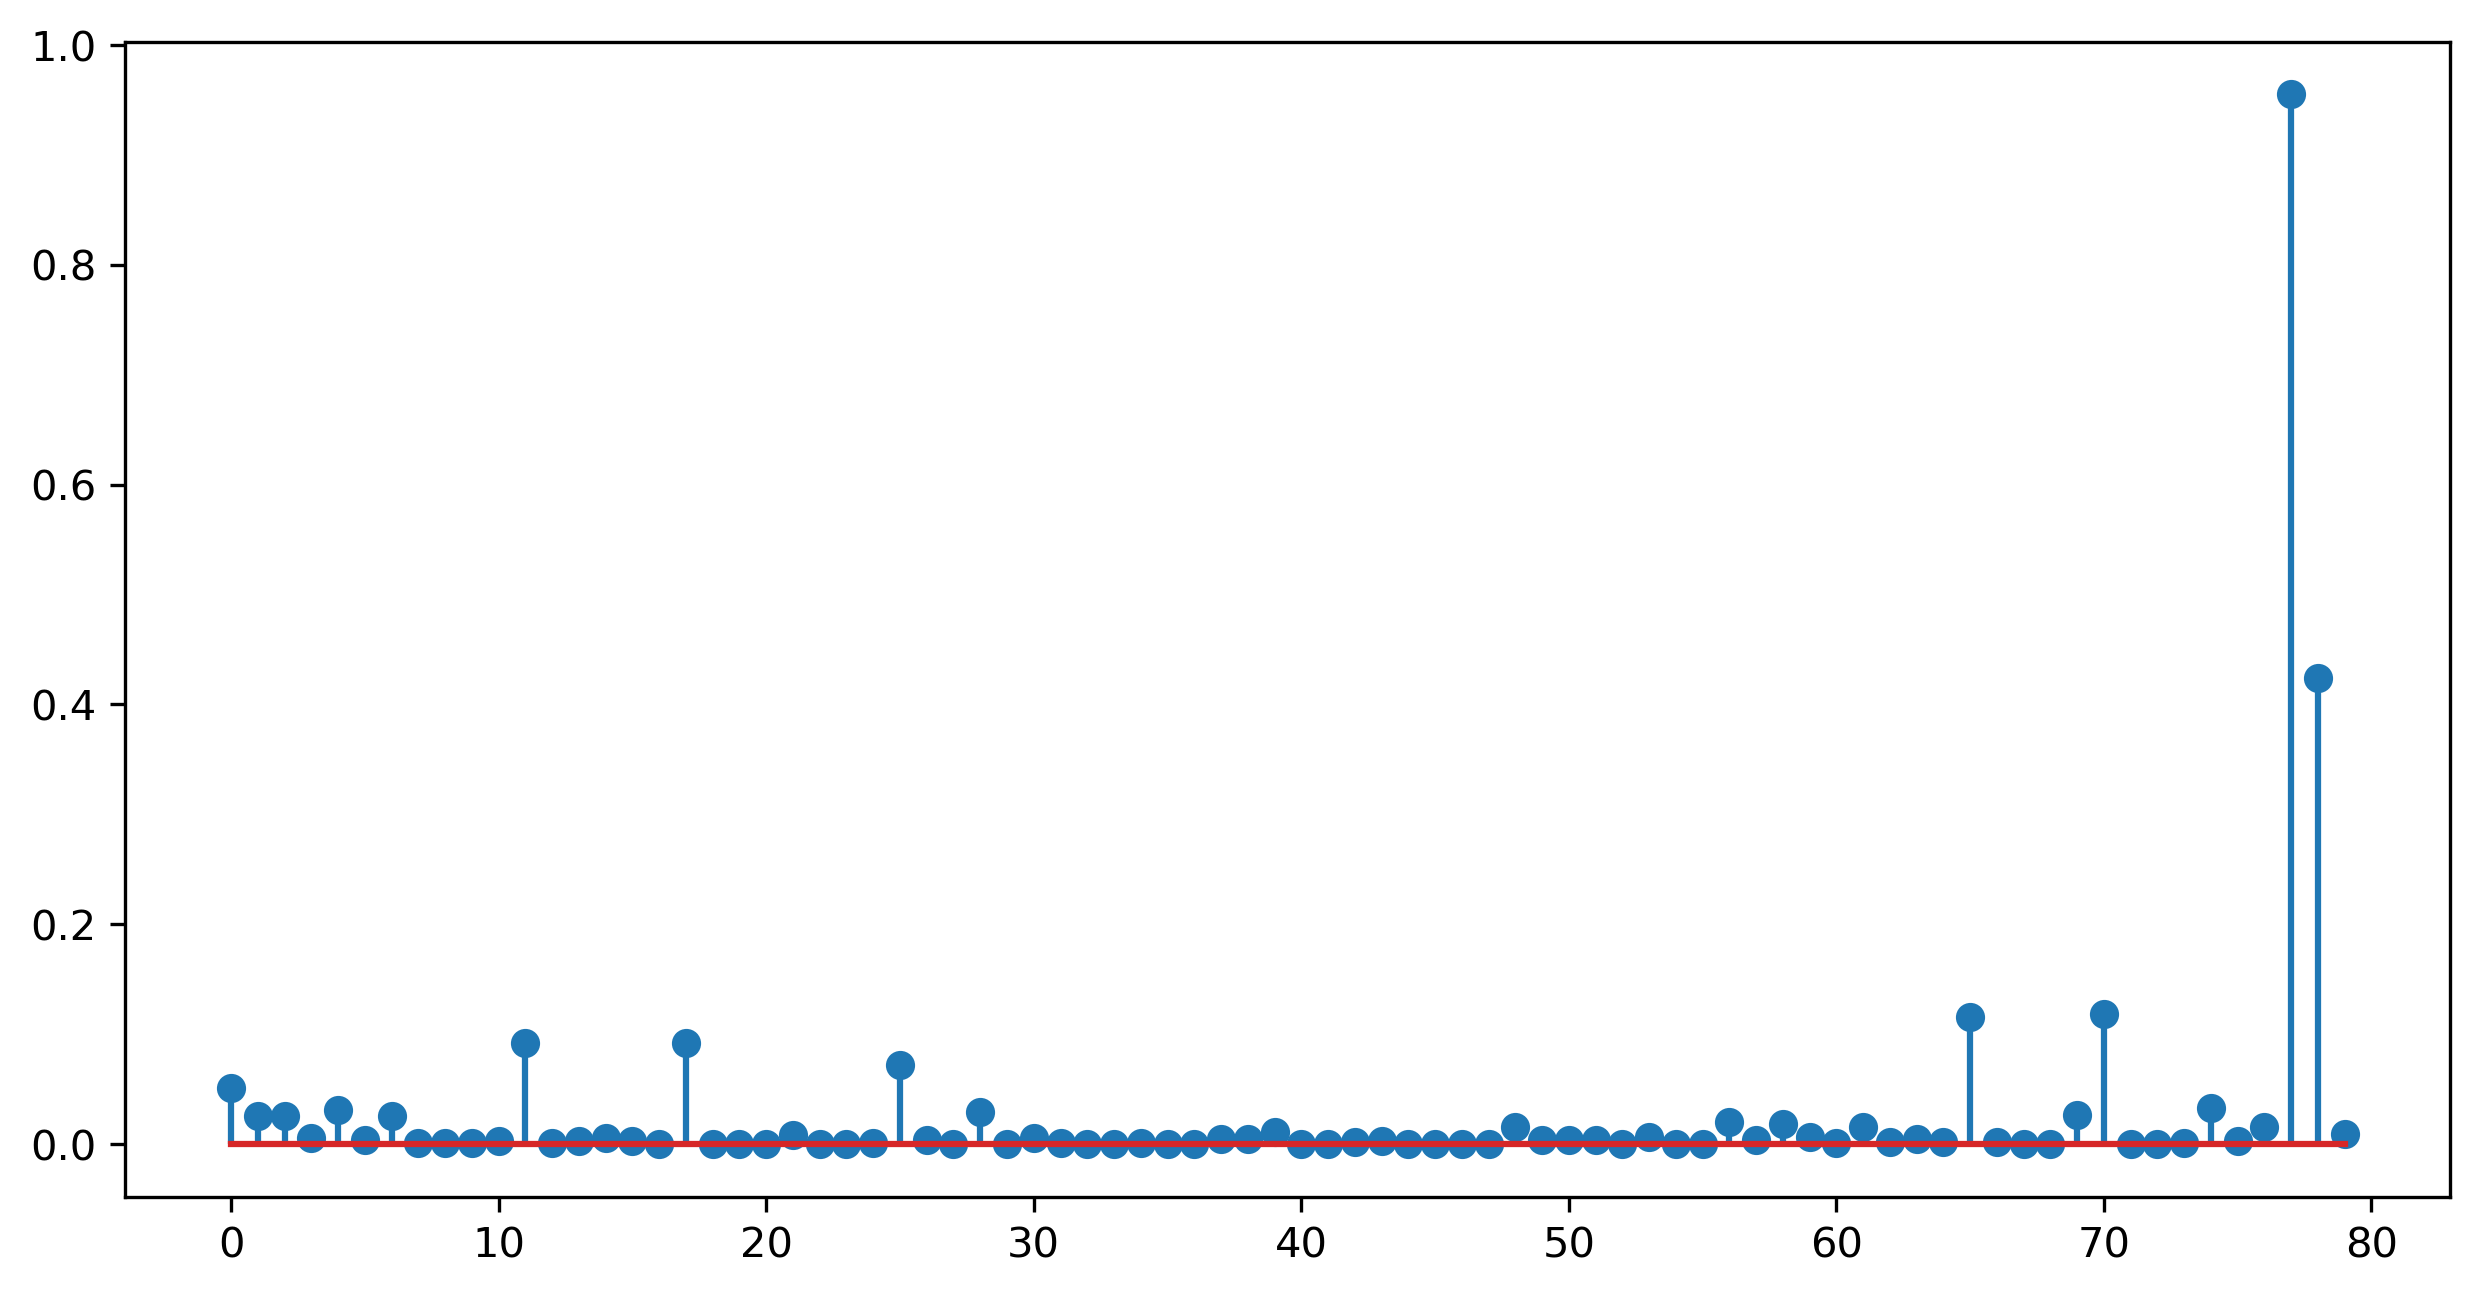

In [52]:
plt.stem(range(len(df)),c)

In [53]:
np.argmax(c),np.max(c)

(77, 0.9548691936312567)

Since the value is <1 , we can stop the diagnostic process and finalize the model

In [54]:
final_model = smf.ols('MPG~SP+HP+VOL',data=df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     114.8
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           3.78e-28
Time:                        10:48:51   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             452.0
Df Residuals:                      76   BIC:                             461.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.7555     12.922      2.148      0.035       2.018      53.493
SP             0.4124      0.139      2.963      0.004       0.135       0.690
HP            -0.2268      0.035     -6.525      0.000      -0.296      -0.158
VOL           -0.1729      0.021     -8.178      0.000      -0.215      -0.131
==============================================================================
Omnibus:                        9.859   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.686
Skew:                           0.767   Prob(JB):                      0.00788
Kurtosis:                       3.742   Cond. No.                     5.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# prediction for new data

In [38]:
newdata=pd.DataFrame({
    'HP':[52],
    'VOL':[65],
    'SP':[200]
    })

In [39]:
newdata

,HP,VOL,SP
0,52,65,200


In [40]:
final_model.predict(newdata)

0    8.512488
dtype: float64